<a href="https://colab.research.google.com/github/Gboavida/datamining2/blob/main/Daytime_Group09_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Daytime Group 9 Notebook**
## Iniobong Pius Udofia (20230959), João Chang (20201620), Matilde Duarte (20230356), Miguel Pimenta (20231000), Pedro Ferreira (20231550)

# <font color='#BFD72F'> Libraries</font>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, BallTree, NearestNeighbors
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import time
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# <font color='#BFD72F'> Importing the Data</font>

In [ ]:
# Step1: Connect Google Colab to Drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/DM2/Projeto/Data'

In [ ]:
train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')

In [ ]:
train = pd.read_csv('DM2_Project Datasets/train.csv')
test = pd.read_csv('DM2_Project Datasets/test.csv')

# <font color='#BFD72F'> 1. Data Understanding</font>

In [ ]:
train.shape

(90165, 21)

In [ ]:
train.columns

Index(['citizen_id', 'name', 'title', 'date_of_birth', 'city', 'country',
       'last_year_avg_monthly_charity_donations',
       'environmental_awareness_rating', 'financial_wellness_index',
       'investment_portfolio_value', 'investments_risk_appetite',
       'investments_risk_tolerance', 'tech_savviness_score',
       'social_media_influence_score', 'entertainment_engagement_factor',
       'avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours',
       'health_consciousness_rating', 'stress_management_score',
       'overall_well_being', 'lifestyle_type'],
      dtype='object')

In [ ]:
train.head()

,citizen_id,name,title,date_of_birth,city,country,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,...,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,lifestyle_type
0,1,Stanley,Mr.,1992-01-03,Mining City,Data Land,0.0,1.9352,99.6431,9.7221,...,NaN,11.9772,9.9506,1.75750,23.0605,0.1776,0.6504,2.8850,106.282,Travel Enthusiast
1,2,Višeslav,Mr.,2005-03-16,Mining City,Data Land,0.0,0.5672,125.1630,5.4308,...,13.6445,11.8776,5.1521,1.96770,NaN,1.2782,1.0190,3.5777,132.121,Fitness Enthusiast
2,3,Rogerio,Mr.,2005-04-04,Mining City,Data Land,1.0,0.5613,105.2490,15.0829,...,5.8867,14.4247,3.6737,3.69071,37.5970,0.0354,3.0854,5.1906,115.547,Health-Conscious
3,4,Jagat,Mr.,1981-09-25,Mining City,Data Land,0.0,0.3543,95.2219,16.3380,...,9.1074,12.3668,5.5798,1.57690,8.2142,1.7763,0.3677,NaN,101.773,Fitness Enthusiast
4,5,Virgínio,Mr.,1987-07-29,Mining City,Data Land,0.0,0.5943,255.8600,148.2250,...,4.0892,15.8389,3.7712,1.95580,14.3443,0.0000,0.6718,2.7076,264.451,Adventure Seeker


As we can see from the list below, there are 14 variables with less tha 90165 values, which indicates the presence of missing values.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90165 entries, 0 to 90164
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   citizen_id                               90165 non-null  int64  
 1   name                                     90165 non-null  object 
 2   title                                    90165 non-null  object 
 3   date_of_birth                            90165 non-null  object 
 4   city                                     90165 non-null  object 
 5   country                                  90165 non-null  object 
 6   last_year_avg_monthly_charity_donations  87911 non-null  float64
 7   environmental_awareness_rating           86558 non-null  float64
 8   financial_wellness_index                 88363 non-null  float64
 9   investment_portfolio_value               88362 non-null  float64
 10  investments_risk_appetite                88813

## <font color='#BFD72F'> 1.1 Descriptive Statistics</font>


In [ ]:
train.describe()

,citizen_id,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being
count,90165.000000,87911.000000,86558.000000,88363.000000,88362.000000,88813.000000,87009.000000,87009.000000,87911.000000,89263.000000,89263.000000,87461.000000,89263.000000,86558.000000,89263.000000
mean,45083.000000,0.196324,1.010520,105.308175,19.109577,4.443178,7.151049,13.459303,6.375599,1.841974,25.269609,0.865667,1.242936,3.212604,113.307251
std,26028.537848,0.554079,0.914724,50.667686,35.481222,2.677584,3.945640,1.486830,4.258794,0.343801,19.353803,1.258624,1.223725,1.138130,50.766418
min,1.000000,-3.000000,0.000000,0.050000,0.500000,0.000000,0.000000,6.861500,0.000000,0.280400,0.000000,-6.601600,0.000000,0.000000,4.997600
25%,22542.000000,0.000000,0.563925,94.472800,5.718225,1.902400,4.659300,12.495200,3.340800,1.643000,8.764950,0.022300,0.656200,2.457100,102.103000
50%,45083.000000,0.000000,0.660800,99.895400,10.483050,4.939700,6.080600,13.477900,4.802200,1.869300,18.164800,0.161000,0.770300,3.076750,107.944000
75%,67624.000000,0.000000,0.972075,106.251000,15.438725,6.913400,8.391300,14.441400,8.807200,2.070800,40.732100,1.404000,1.232900,3.860700,115.111000
max,90165.000000,5.000000,12.836000,593.847000,446.866000,12.072700,44.256200,30.433600,44.965900,3.690710,180.529000,9.416800,13.431600,9.318200,600.830000


In [ ]:
train.describe(include = ['O'])

,name,title,date_of_birth,city,country,lifestyle_type
count,90165,90165,90165,90165,90165,90165
unique,9946,4,16878,1,1,5
top,Emma,Mr.,1994-05-29,Mining City,Data Land,Health-Conscious
freq,246,45126,20,90165,90165,18131


# <font color='#BFD72F'> 2. Data Preprocessing- Train dataset</font>

## <font color='#BFD72F'> 2.1 Handling Incoherences</font>


In [ ]:
# Checking if every citizen ID is unique
is_unique = train['citizen_id'].is_unique
is_unique


True

For the variable 'title', since Miss, Mrs and Ms represent Female individuals, we are renaming the column to 'gender' and assigning the observations only two values: 'Male' for 'Mr.' and Female for the remaining.

In [ ]:
train['title'].value_counts()

title
Mr.     45126
Miss    15105
Mrs.    14991
Ms.     14943
Name: count, dtype: int64

In [ ]:
train['title'] = train['title'].replace({
    'Miss': 'Female',
    'Mrs.': 'Female',
    'Ms.' : 'Female',
    'Mr.' : 'Male',
})

In [ ]:
train.rename(columns={'title': 'gender'}, inplace=True)

The next step was to turn this variable into a numeric and binary woman, where the value 0 represents male individuals, while 1 represents female individuals.

In [ ]:
train['gender'] = train['gender'].replace({
    'Male': 0,
    'Female' : 1,

})

In [ ]:
train['gender'] = train['gender'].astype('int32')
train['gender'].dtype

dtype('int32')

In [ ]:
train['gender'].value_counts()

gender
0    45126
1    45039
Name: count, dtype: int64

### Check the interval [0;10]

In [ ]:
train['environmental_awareness_rating'].max()

12.836

In [ ]:
train['environmental_awareness_rating'].min()

0.0

### Correct values from 0 to 10

Since the variables 'environmental_awareness_rating' and 'health_conscious_rating' are suppose to range from 0 to 10, and there are values higher than 10, we decided to assign each of these values to 10.
Furthermore, 'last_year_avg_monthly_charity_donations', 'avg_weekly_exercise_hours', 'avg_monthly_entertainment_expenses' cannot have negative values, we decided to transform each of those to their absolute value.



Text(0.5, 1.0, 'Histogram of environmental_awareness_rating As-Is')

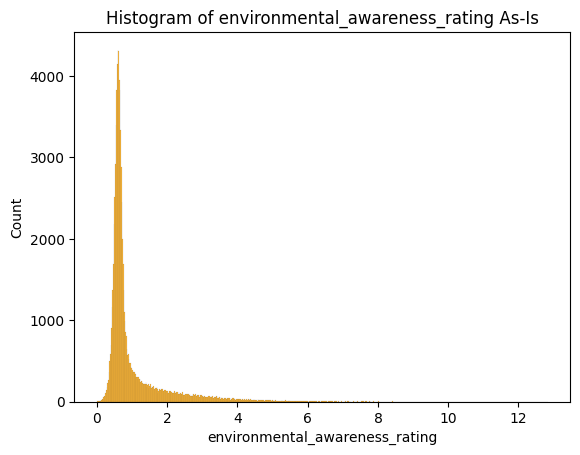

In [ ]:
sns.histplot(train['environmental_awareness_rating'], color='orange')
plt.title('Histogram of environmental_awareness_rating As-Is')

The values above 10 are incoherent for this varables, therefore they need to be fixed.

In [ ]:
train['environmental_awareness_rating'] = train['environmental_awareness_rating'].apply(lambda x: min(max(abs(x), 0), 10))


Text(0.5, 1.0, 'Histogram of environmental_awareness_rating After Treatment')

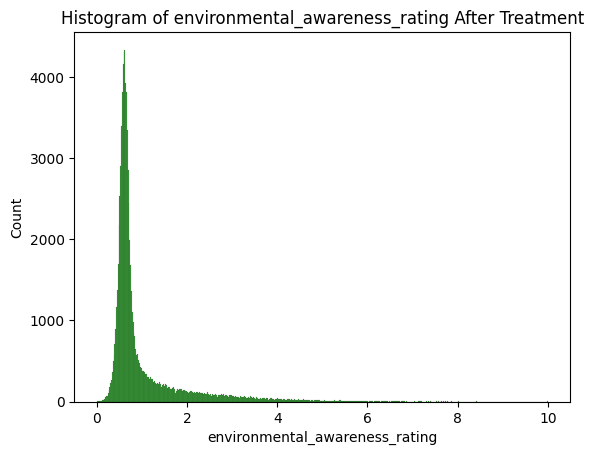

In [ ]:
sns.histplot(train['environmental_awareness_rating'], color='green')
plt.title('Histogram of environmental_awareness_rating After Treatment')

This variable is right skewed with a high representation in the lower values.

In [ ]:
train['health_consciousness_rating'].max()

13.4316

In [ ]:
train['health_consciousness_rating'].min()

0.0

Text(0.5, 1.0, 'Histogram of health_consciousness_rating As-Is')

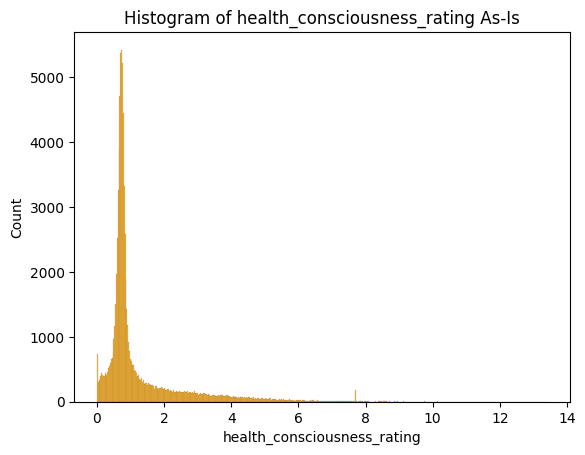

In [ ]:
sns.histplot(train['health_consciousness_rating'], color='orange')
plt.title('Histogram of health_consciousness_rating As-Is')

This variable also shows values above 10 which also need to be corrected.

In [ ]:
train['health_consciousness_rating'] = train['health_consciousness_rating'].apply(lambda x: min(max(abs(x), 0), 10))


Text(0.5, 1.0, 'Histogram of health_consciousness_rating After Treatment')

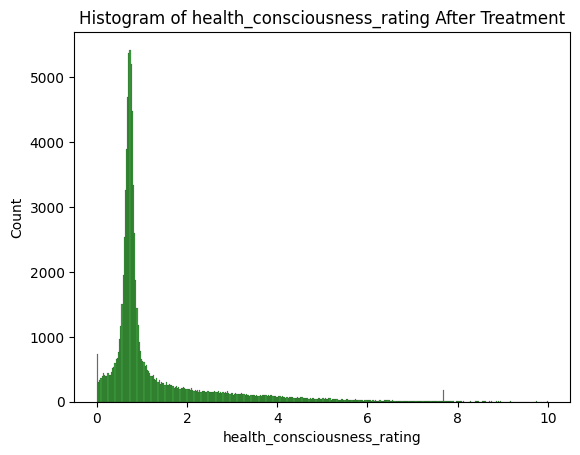

In [ ]:
sns.histplot(train['health_consciousness_rating'], color='green')
plt.title('Histogram of health_consciousness_rating After Treatment')

This variables is right skewed also with a very high representation on the lower x-axis values.

### Convert the negative values to their absolute value.

In [ ]:
train['last_year_avg_monthly_charity_donations'].min()

-3.0

Text(0.5, 1.0, 'Histogram of last_year_avg_monthly_charity_donations As-Is')

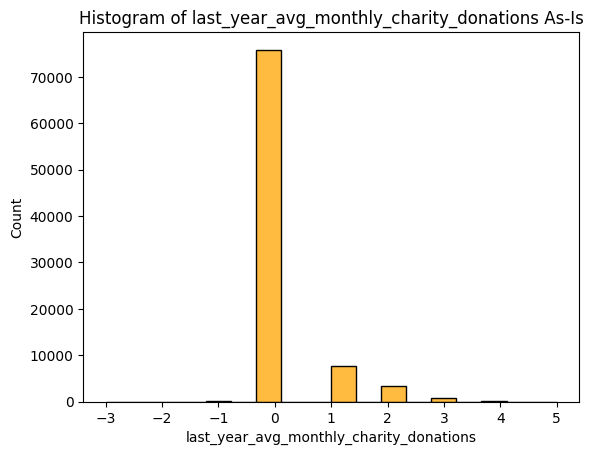

In [ ]:
sns.histplot(train['last_year_avg_monthly_charity_donations'], color='orange')
plt.title('Histogram of last_year_avg_monthly_charity_donations As-Is')

We can see that some values are negative which does not make sense for this variable and will be corrected below.

In [ ]:
train['last_year_avg_monthly_charity_donations'] = train['last_year_avg_monthly_charity_donations'].apply(lambda x: abs(x) if x < 0 else x)


Text(0.5, 1.0, 'Histogram of last_year_avg_monthly_charity_donations After Treatment')

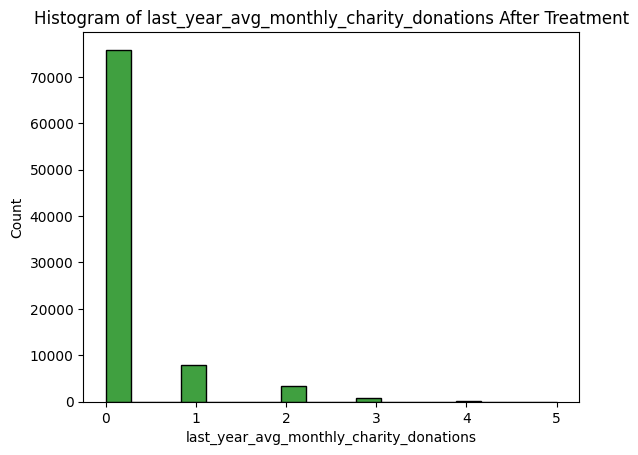

In [ ]:
sns.histplot(train['last_year_avg_monthly_charity_donations'], color='green')
plt.title('Histogram of last_year_avg_monthly_charity_donations After Treatment')

This variables is skewed to the right and on average most of the citizens did not make a donation on the previous year.

Text(0.5, 1.0, 'Histogram of avg_weekly_exercise_hours As-Is')

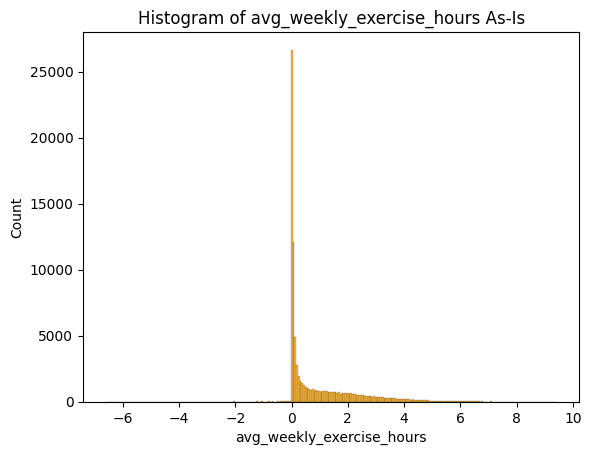

In [ ]:
sns.histplot(train['avg_weekly_exercise_hours'], color='orange')
plt.title('Histogram of avg_weekly_exercise_hours As-Is')

There are negative values which does not make sense for this variables, therefore they will be corrected below.

In [ ]:
train['avg_weekly_exercise_hours'].min()

-6.6016

In [ ]:
train['avg_weekly_exercise_hours'] = train['avg_weekly_exercise_hours'].apply(lambda x: abs(x) if x < 0 else x)


Text(0.5, 1.0, 'Histogram of avg_weekly_exercise_hours After Treatment')

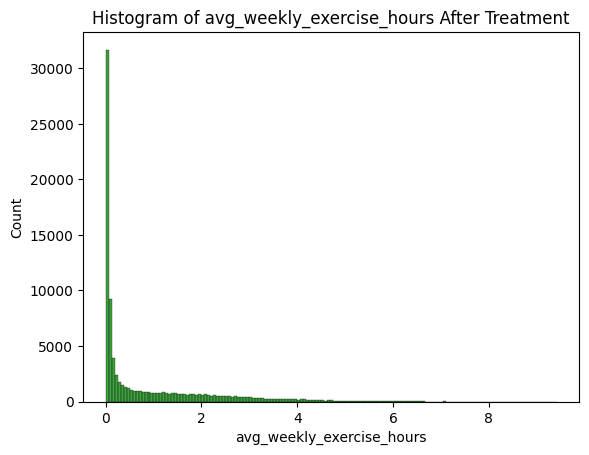

In [ ]:
sns.histplot(train['avg_weekly_exercise_hours'], color='green')
plt.title('Histogram of avg_weekly_exercise_hours After Treatment')

The negative values were assign to their absolute value and the distribution show a right skewness with an averegae weekly exercise hours close to zero.

### For the variable below, the minimum value is 0, so we do not need to take any further steps.

In [ ]:
train['avg_monthly_entertainment_expenses'].min()

0.0

## <font color='#BFD72F'> 2.2 Create Variable Age</font>

---




Create a new variable 'Age' based on the variable date_of_birth

In [ ]:
#convert date_of_birth to datetime format
train['date_of_birth'] = pd.to_datetime(train['date_of_birth'])

In [ ]:
#calculate current date
current_date = datetime.now()

In [ ]:
#calculate age
train['age'] = (current_date - train['date_of_birth']).dt.days // 365

In [ ]:
train.head()

,citizen_id,name,gender,date_of_birth,city,country,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,...,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,lifestyle_type,age
0,1,Stanley,0,1992-01-03,Mining City,Data Land,0.0,1.9352,99.6431,9.7221,...,11.9772,9.9506,1.75750,23.0605,0.1776,0.6504,2.8850,106.282,Travel Enthusiast,32
1,2,Višeslav,0,2005-03-16,Mining City,Data Land,0.0,0.5672,125.1630,5.4308,...,11.8776,5.1521,1.96770,NaN,1.2782,1.0190,3.5777,132.121,Fitness Enthusiast,19
2,3,Rogerio,0,2005-04-04,Mining City,Data Land,1.0,0.5613,105.2490,15.0829,...,14.4247,3.6737,3.69071,37.5970,0.0354,3.0854,5.1906,115.547,Health-Conscious,19
3,4,Jagat,0,1981-09-25,Mining City,Data Land,0.0,0.3543,95.2219,16.3380,...,12.3668,5.5798,1.57690,8.2142,1.7763,0.3677,NaN,101.773,Fitness Enthusiast,42
4,5,Virgínio,0,1987-07-29,Mining City,Data Land,0.0,0.5943,255.8600,148.2250,...,15.8389,3.7712,1.95580,14.3443,0.0000,0.6718,2.7076,264.451,Adventure Seeker,36


In [ ]:
train['age'].max()

124

In [ ]:
train['age'].min()

0

Text(0.5, 1.0, 'Histogram of age As-Is')

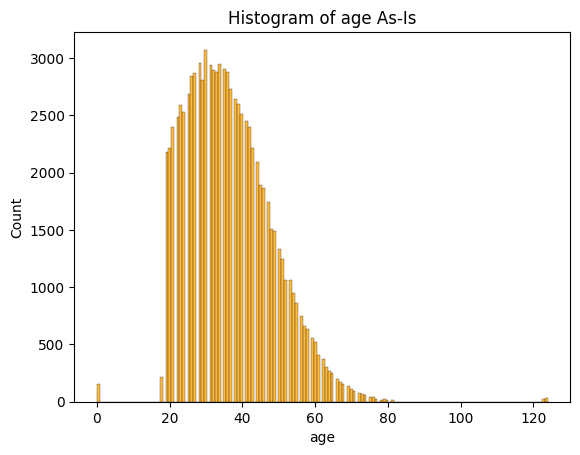

In [ ]:
sns.histplot(train['age'], color='orange')
plt.title('Histogram of age As-Is')

We decided to create a range for the varaible 'Age', assigning its minimum to 18 years old, since we thought it made sense for the scenario that the individuals were at least 18, and its maximum to 85 years old.

In [ ]:
train = train[(train['age'] >= 18) & (train['age'] <= 85)]


Text(0.5, 1.0, 'Histogram of age After Outlier Removal')

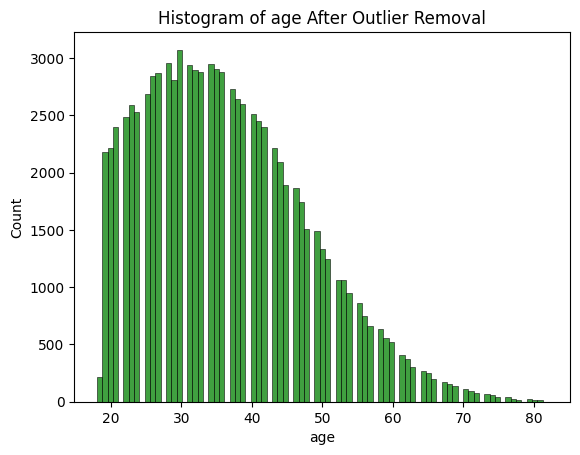

In [ ]:
sns.histplot(train['age'], color='green')
plt.title('Histogram of age After Outlier Removal')

The age distribution shows a small skewness to the right, indicating a younger representation of the citizens on the dataset.

## <font color='#BFD72F'> 2.3 Data Visualization</font>


Text(0.5, 1.0, 'Histogram of last_year_avg_monthly_charity_donations')

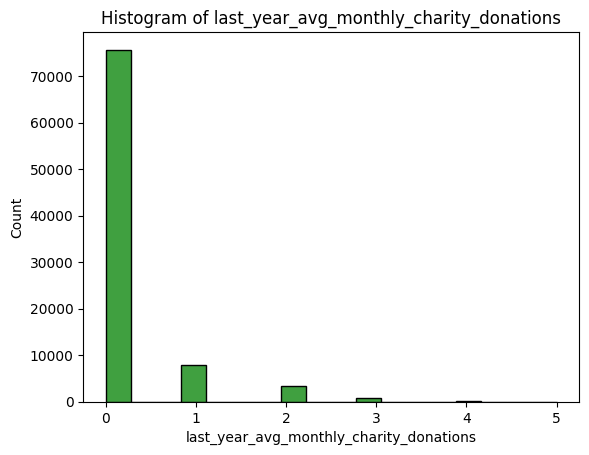

In [ ]:
sns.histplot(train['last_year_avg_monthly_charity_donations'], color = 'green')
plt.title('Histogram of last_year_avg_monthly_charity_donations')

This variables is skewed to the right and on average most of the citizens did not make a donation on the previous year.

Text(0.5, 1.0, 'Histogram of environmental_awareness_rating')

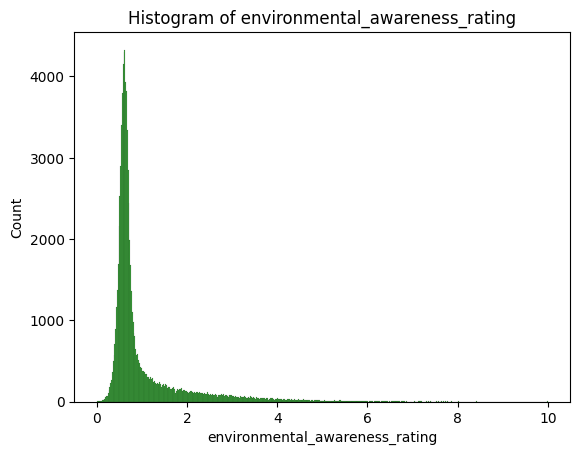

In [ ]:
sns.histplot(train['environmental_awareness_rating'], color='green')
plt.title('Histogram of environmental_awareness_rating')

This variable is right skewed with a high representation in the lower x-axis values.

Text(0.5, 1.0, 'Histogram of financial_wellness_index')

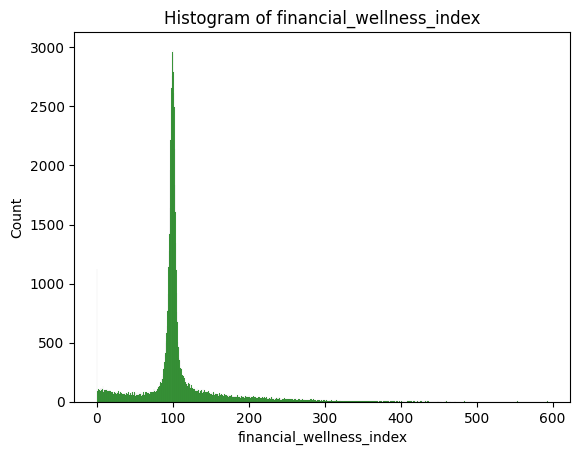

In [ ]:
sns.histplot(train['financial_wellness_index'], color='green')
plt.title('Histogram of financial_wellness_index')

The majority of the citizens are represented on the index equal to a hundred.

Text(0.5, 1.0, 'Histogram of investment_portfolio_value')

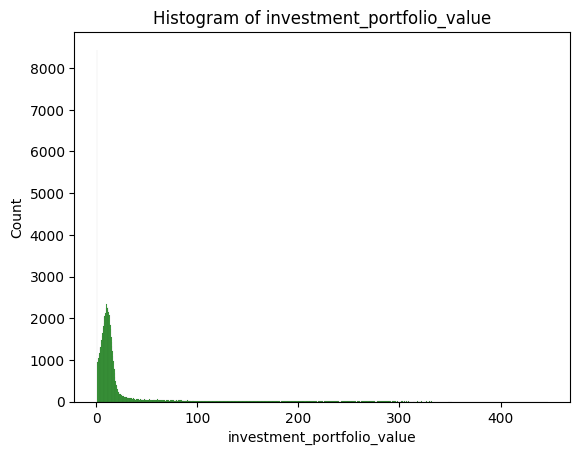

In [ ]:
sns.histplot(train['investment_portfolio_value'], color='green')
plt.title('Histogram of investment_portfolio_value')

This variable shows a little right skewness where the most representation of investments are close to zero.

Text(0.5, 1.0, 'Boxplot of investment_portfolio_value')

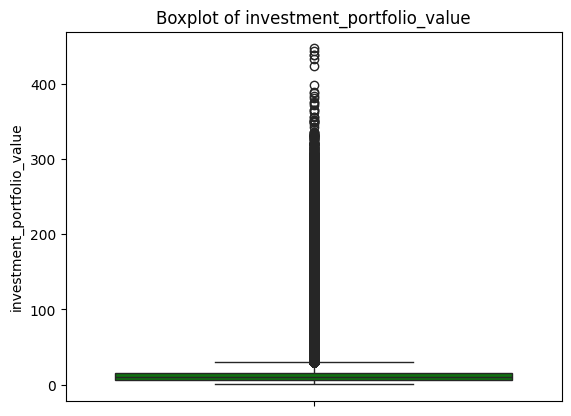

In [ ]:
sns.boxplot(train['investment_portfolio_value'], color='green')
plt.title('Boxplot of investment_portfolio_value')

We can see that there are some investments between 50 and more than 400 thousand but less concentration of citizens on that domain.

Text(0.5, 1.0, 'Histogram of investments_risk_appetite')

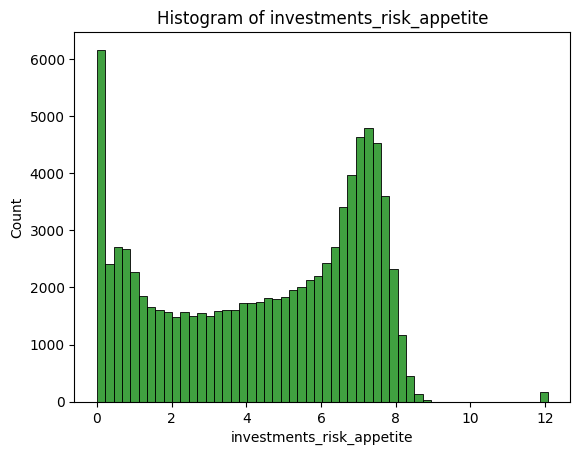

In [ ]:
sns.histplot(train['investments_risk_appetite'], color='green')
plt.title('Histogram of investments_risk_appetite')

We can see that the citizens willingness to take risks is close to be evenly distributed where the mode is to not take any risks and very few taking extreme risks.

Text(0.5, 1.0, 'Boxplot of investments_risk_appetite')

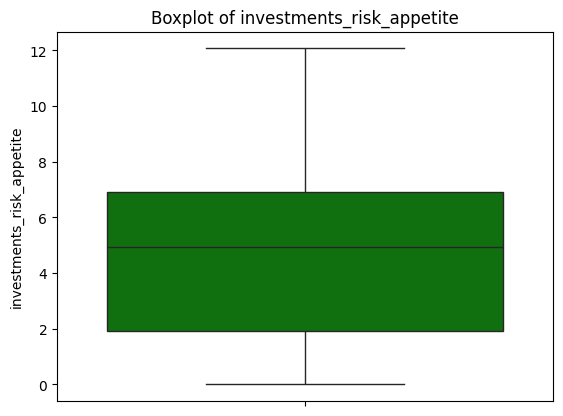

In [ ]:
sns.boxplot(train['investments_risk_appetite'], color='green')
plt.title('Boxplot of investments_risk_appetite')

We can confirm by the boxplot that this variable is evenly distributed.

Text(0.5, 1.0, 'Histogram of investments_risk_tolerance')

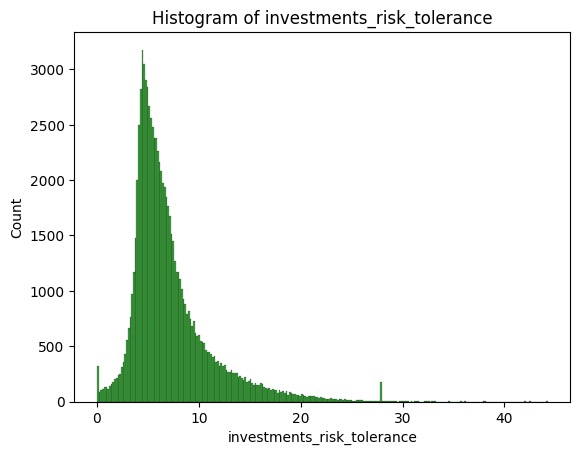

In [ ]:
sns.histplot(train['investments_risk_tolerance'], color='green')
plt.title('Histogram of investments_risk_tolerance')

This variable is right skewed, meaning that citizens have low tolerance to take risks on their investments.

Text(0.5, 1.0, 'Boxplot of investments_risk_tolerance')

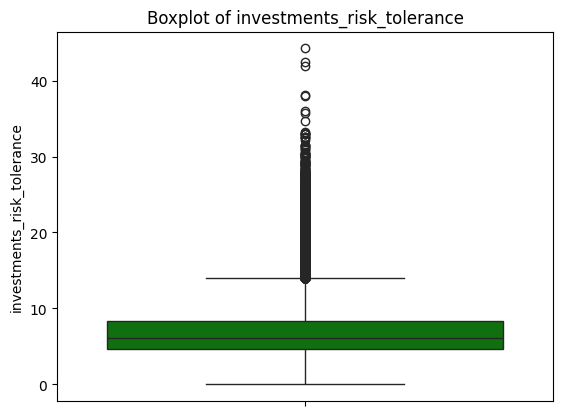

In [ ]:
sns.boxplot(train['investments_risk_tolerance'], color='green')
plt.title('Boxplot of investments_risk_tolerance')

We can see some citizens falling out of the IQR representing the higher tolerence takers.

Text(0.5, 1.0, 'Histogram of tech_savviness_score')

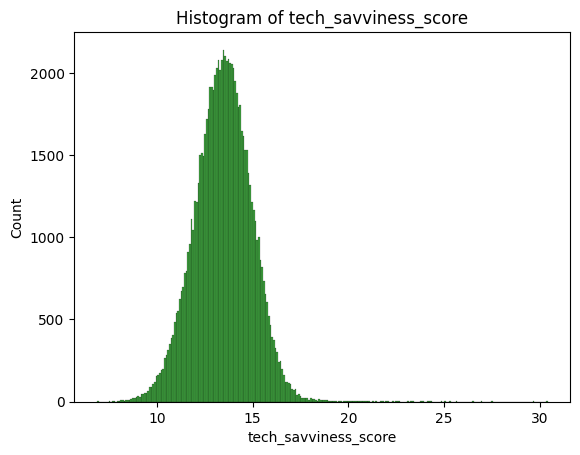

In [ ]:
sns.histplot(train['tech_savviness_score'], color='green')
plt.title('Histogram of tech_savviness_score')

This variable is represented in a normal distribtuion with the mean close to 13.5

Text(0.5, 1.0, 'Boxplot of tech_savviness_score')

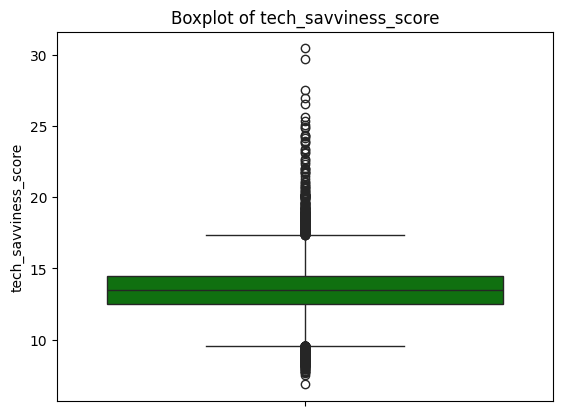

In [ ]:
sns.boxplot(train['tech_savviness_score'], color='green')
plt.title('Boxplot of tech_savviness_score')

We can identify both tails of the distribution falling short to be in the IQR.

Text(0.5, 1.0, 'Histogram of social_media_influence_score')

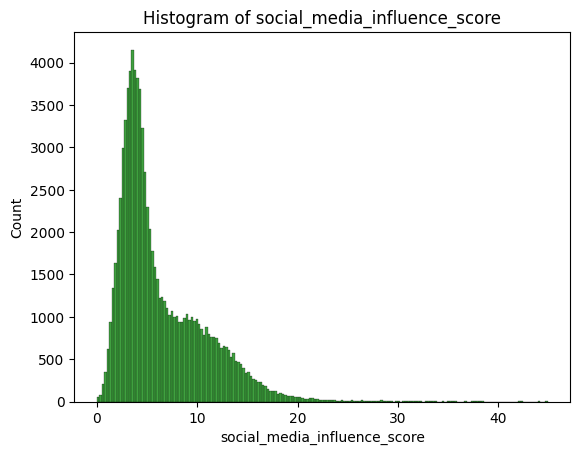

In [ ]:
sns.histplot(train['social_media_influence_score'], color='green')
plt.title('Histogram of social_media_influence_score')

We can see by this variable that the majority of the citizens are not very active on social media, leading to a right skewed distribution.

Text(0.5, 1.0, 'Boxplot of social_media_influence_score')

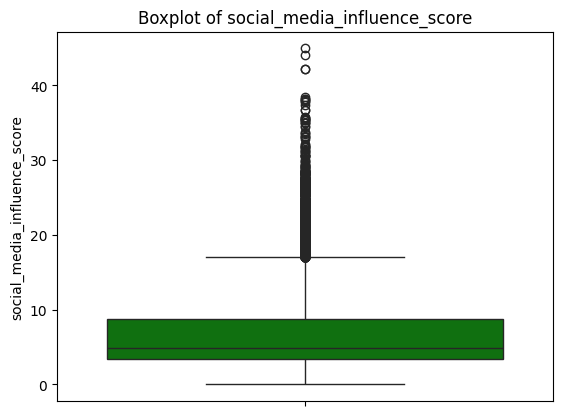

In [ ]:
sns.boxplot(train['social_media_influence_score'], color='green')
plt.title('Boxplot of social_media_influence_score')

Following the previous analysis we can see some citizens out of the IQR, who represent the ones most active on socail media.

Text(0.5, 1.0, 'Histogram of entertainment_engagement_factor')

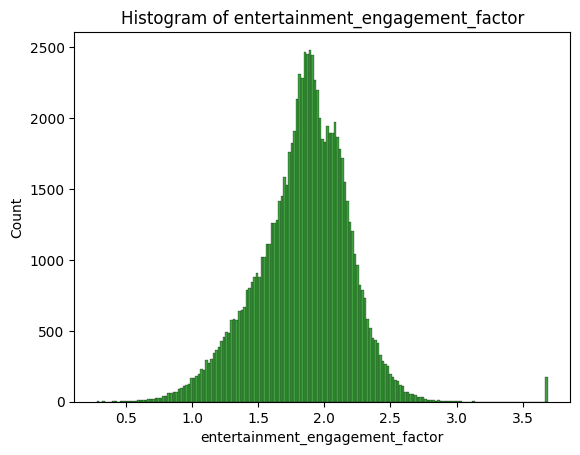

In [ ]:
sns.histplot(train['entertainment_engagement_factor'], color='green')
plt.title('Histogram of entertainment_engagement_factor')

By this visial we can observe a distribution very close to normal indicating a balance between the citizens engagement in the entertainment activities.

Text(0.5, 1.0, 'Boxplot of entertainment_engagement_factor')

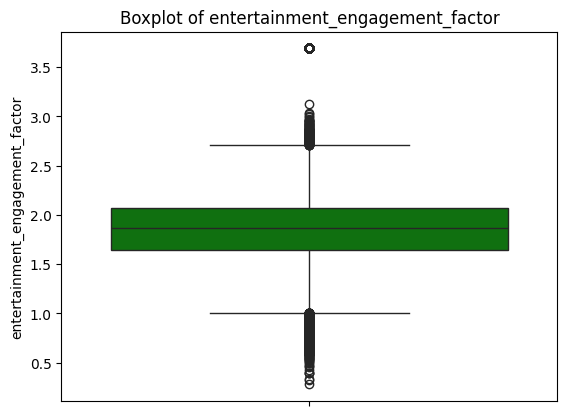

In [ ]:
sns.boxplot(train['entertainment_engagement_factor'], color='green')
plt.title('Boxplot of entertainment_engagement_factor')

By this boxplot we analyse some values out of the IQR on the lower and upper bound and possible outliers above the 3.5 value.

Text(0.5, 1.0, 'Histogram of avg_monthly_entertainment_expenses')

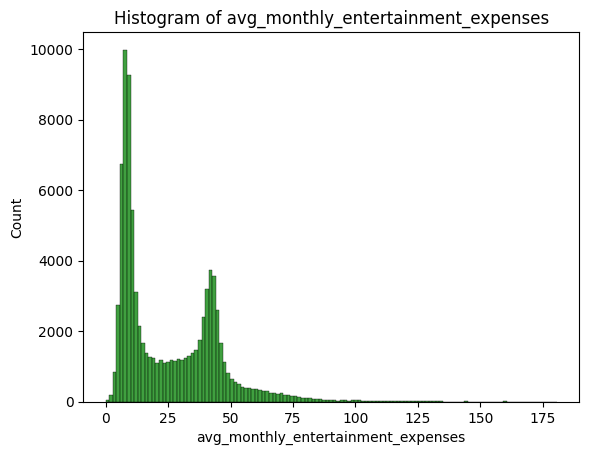

In [ ]:
sns.histplot(train['avg_monthly_entertainment_expenses'], color='green')
plt.title('Histogram of avg_monthly_entertainment_expenses')

This variable shows a bimodal distribution showing a group of citizens with a lower average monthly expenses and a group with high average monthly expenses.

Text(0.5, 1.0, 'Boxplot of avg_monthly_entertainment_expenses')

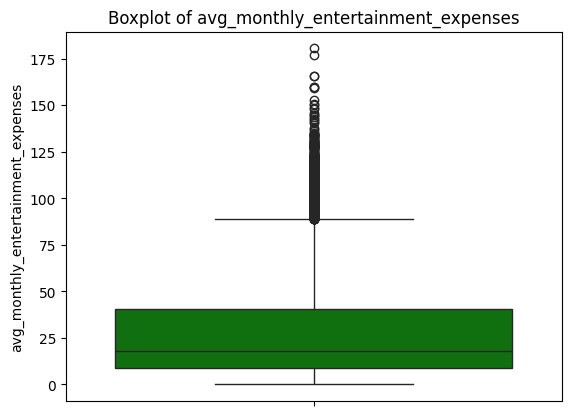

In [ ]:
sns.boxplot(train['avg_monthly_entertainment_expenses'], color='green')
plt.title('Boxplot of avg_monthly_entertainment_expenses')

By this boxplot we can see the data ir right skewed.

Text(0.5, 1.0, 'Histogram of avg_weekly_exercise_hours')

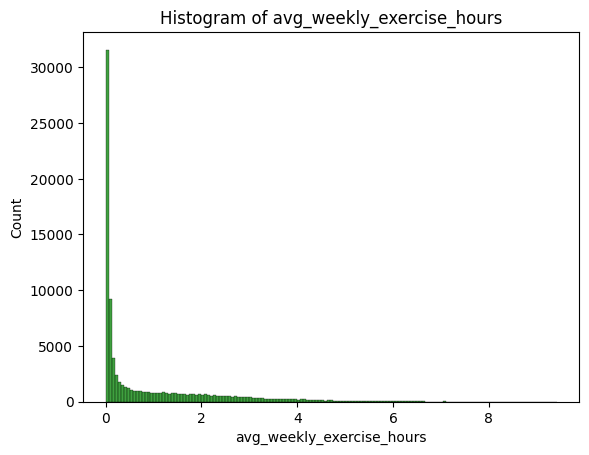

In [ ]:
sns.histplot(train['avg_weekly_exercise_hours'], color='green')
plt.title('Histogram of avg_weekly_exercise_hours')

The distribution show a right skewness with an averegae weekly exercise hours close to zero.

Text(0.5, 1.0, 'Histogram of health_consciousness_rating')

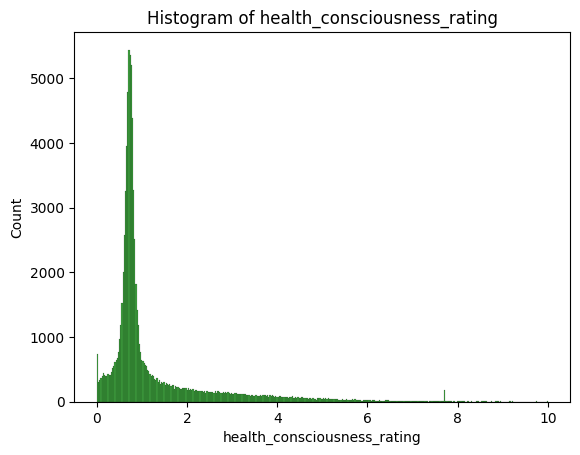

In [ ]:
sns.histplot(train['health_consciousness_rating'], color='green')
plt.title('Histogram of health_consciousness_rating')

This variables is right skewed also with a very high representation on the lower x-axis values.

Text(0.5, 1.0, 'Histogram of stress_management_score')

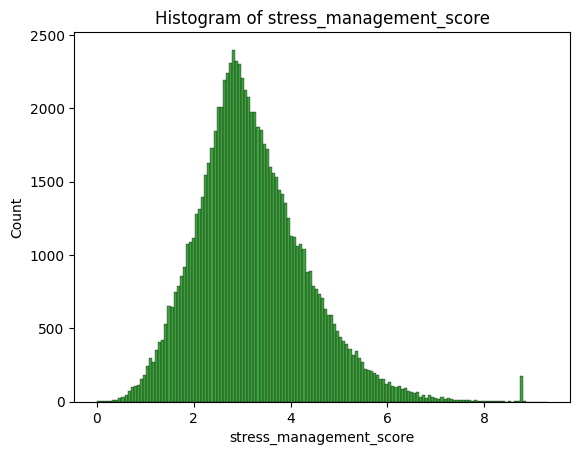

In [ ]:
sns.histplot(train['stress_management_score'], color='green')
plt.title('Histogram of stress_management_score')

The variable stress management score is close to a normal distribution and shows some possible outliers.

Text(0.5, 1.0, 'Boxplot of stress_management_score')

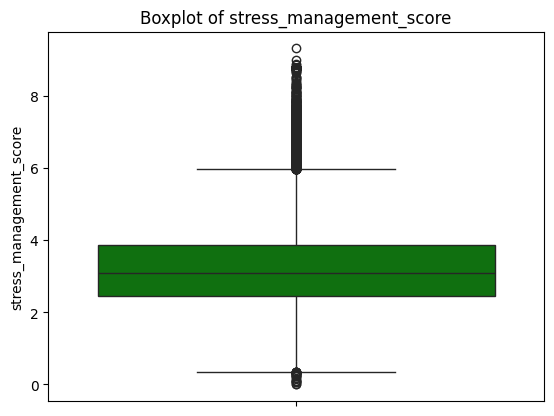

In [ ]:
sns.boxplot(train['stress_management_score'], color='green')
plt.title('Boxplot of stress_management_score')

In the boxplot we can see some values out of thr IQR on both sides.

Text(0.5, 1.0, 'Histogram of overall_well_being')

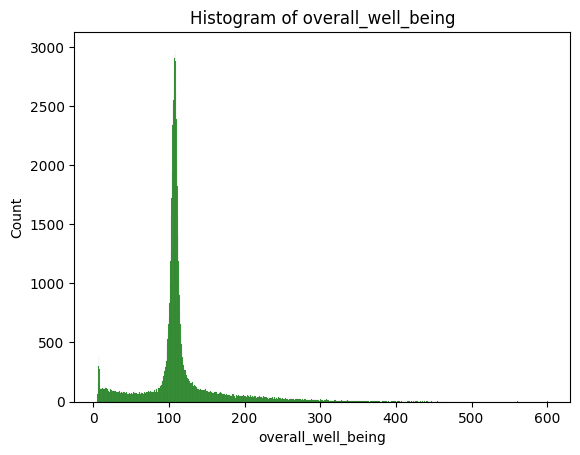

In [ ]:
sns.histplot(train['overall_well_being'], color='green')
plt.title('Histogram of overall_well_being')

In the variable overall well being most of the records represent the mean and mode value close to a hundred. We can also see a slightly right skewness in the distribution.

Text(0.5, 1.0, 'Boxplot of overall_well_being')

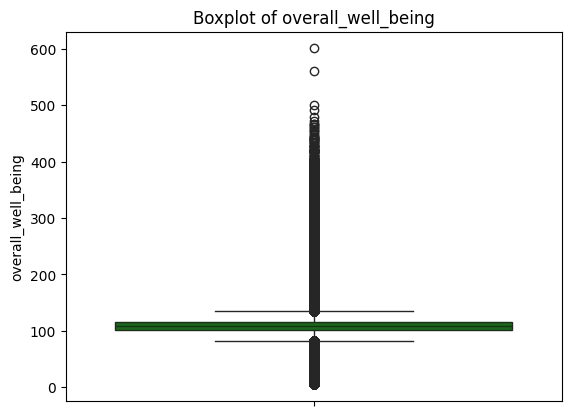

In [ ]:
sns.boxplot(train['overall_well_being'], color='green')
plt.title('Boxplot of overall_well_being')

In the boxplot for the overall well being we can add to the previous analysis that most citizens are very concentrated close to the score of a hundred.

Text(0.5, 1.0, 'Histogram of Age')

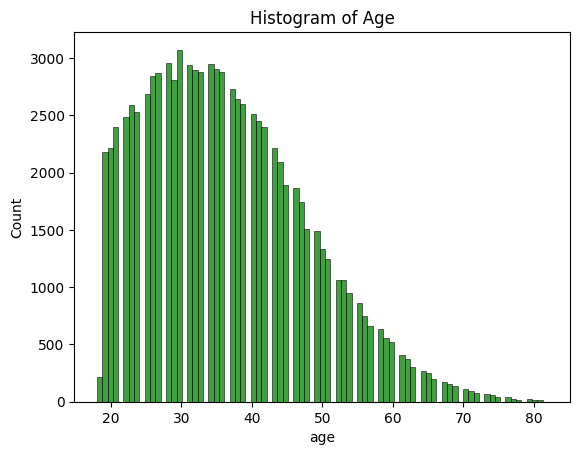

In [ ]:
sns.histplot(train['age'], color='green')
plt.title('Histogram of Age')

The age distribution shows a small skewness to the right, indicating a younger representation of the citizens on the dataset.

## <font color='#BFD72F'> 2.4 Treating Unary Variables </font>


In [ ]:
train_unary = train.columns[train.nunique() == 1]
print('Unary Variables: ', train_unary)

Unary Variables:  Index(['city', 'country'], dtype='object')


In [ ]:
# Drop unary variable
train['city'].value_counts()

city
Mining City    89961
Name: count, dtype: int64

In [ ]:
train = train.drop('city', axis=1)

In [ ]:
# Drop unary variable
train['country'].value_counts()

country
Data Land    89961
Name: count, dtype: int64

In [ ]:
train = train.drop('country', axis=1)

## <font color='#BFD72F'> 2.5 Handling Duplicate Values </font>


In [ ]:
train_duplicate_rows = train.duplicated().sum()
print("Number of Duplicate Rows:", train_duplicate_rows)

Number of Duplicate Rows: 0


In [ ]:
train.drop_duplicates (inplace=True)

In [ ]:
train_duplicate_rows = train.duplicated().sum()
print("Number of Duplicate Rows:", train_duplicate_rows)

Number of Duplicate Rows: 0


### Assigning correct index

In [ ]:
train.set_index('citizen_id', inplace = True)

In [ ]:
train.head()

,name,gender,date_of_birth,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,lifestyle_type,age
citizen_id,,,,,,,,,,,,,,,,,,,
1,Stanley,0,1992-01-03,0.0,1.9352,99.6431,9.7221,3.5313,NaN,11.9772,9.9506,1.75750,23.0605,0.1776,0.6504,2.8850,106.282,Travel Enthusiast,32
2,Višeslav,0,2005-03-16,0.0,0.5672,125.1630,5.4308,6.6175,13.6445,11.8776,5.1521,1.96770,NaN,1.2782,1.0190,3.5777,132.121,Fitness Enthusiast,19
3,Rogerio,0,2005-04-04,1.0,0.5613,105.2490,15.0829,6.9319,5.8867,14.4247,3.6737,3.69071,37.5970,0.0354,3.0854,5.1906,115.547,Health-Conscious,19
4,Jagat,0,1981-09-25,0.0,0.3543,95.2219,16.3380,7.0968,9.1074,12.3668,5.5798,1.57690,8.2142,1.7763,0.3677,NaN,101.773,Fitness Enthusiast,42
5,Virgínio,0,1987-07-29,0.0,0.5943,255.8600,148.2250,5.8014,4.0892,15.8389,3.7712,1.95580,14.3443,0.0000,0.6718,2.7076,264.451,Adventure Seeker,36


## <font color='#BFD72F'> 2.6 Data Visualisation - Pearson Correlation</font>

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89961 entries, 1 to 90165
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   name                                     89961 non-null  object        
 1   gender                                   89961 non-null  int32         
 2   date_of_birth                            89961 non-null  datetime64[ns]
 3   last_year_avg_monthly_charity_donations  87713 non-null  float64       
 4   environmental_awareness_rating           86363 non-null  float64       
 5   financial_wellness_index                 88163 non-null  float64       
 6   investment_portfolio_value               88160 non-null  float64       
 7   investments_risk_appetite                88611 non-null  float64       
 8   investments_risk_tolerance               86813 non-null  float64       
 9   tech_savviness_score                     868

In [ ]:
train_dummy_columns = train.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

In [ ]:
train_dummies = pd.get_dummies(train_dummy_columns)
train_dummies.shape

(89961, 21)

In [ ]:
train_corr = train_dummies.corr()
train_corr

,gender,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,...,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,age,lifestyle_type_Adventure Seeker,lifestyle_type_Fitness Enthusiast,lifestyle_type_Health-Conscious,lifestyle_type_Investor,lifestyle_type_Travel Enthusiast
gender,1.000000,-0.003971,0.003208,-0.006134,0.000520,0.001049,-0.003620,0.002222,0.001621,-0.000874,...,0.002661,-0.006025,-0.001926,-0.005942,0.004444,0.004843,0.000061,-0.000407,-0.006132,0.001645
last_year_avg_monthly_charity_donations,-0.003971,1.000000,0.034043,-0.066111,0.054354,0.032717,0.037593,-0.017202,-0.169074,0.012599,...,-0.230312,0.228018,0.260928,-0.061136,-0.002574,-0.146851,-0.148287,0.377169,-0.004848,-0.078197
environmental_awareness_rating,0.003208,0.034043,1.000000,-0.139695,0.143515,0.029223,0.082269,0.029190,-0.152905,0.096891,...,0.226875,-0.196919,0.038219,-0.144342,0.007911,0.388909,-0.087200,-0.165500,-0.062255,-0.073321
financial_wellness_index,-0.006134,-0.066111,-0.139695,1.000000,0.102778,-0.038078,0.030438,-0.011094,-0.165925,-0.042188,...,-0.056142,0.072287,-0.045489,0.999644,0.002781,-0.009856,-0.016549,0.023356,0.017288,-0.014338
investment_portfolio_value,0.000520,0.054354,0.143515,0.102778,1.000000,0.010432,0.028793,0.075705,-0.142069,-0.003471,...,-0.054509,-0.064134,-0.034583,0.102441,0.005862,0.059491,-0.090501,-0.107131,-0.058635,0.197387
investments_risk_appetite,0.001049,0.032717,0.029223,-0.038078,0.010432,1.000000,0.441116,0.050555,-0.014854,0.029311,...,-0.041321,-0.013543,0.033725,-0.037830,0.004468,-0.000323,0.010203,0.022835,-0.048274,0.015544
investments_risk_tolerance,-0.003620,0.037593,0.082269,0.030438,0.028793,0.441116,1.000000,-0.089176,-0.265870,0.031786,...,0.002876,-0.039251,0.002879,0.028410,0.002678,0.018225,-0.079790,-0.006368,0.176921,-0.109300
tech_savviness_score,0.002222,-0.017202,0.029190,-0.011094,0.075705,0.050555,-0.089176,1.000000,0.049333,0.049552,...,-0.069108,-0.074381,0.015380,0.001685,-0.002159,-0.076270,-0.043014,-0.081535,-0.055574,0.257237
social_media_influence_score,0.001621,-0.169074,-0.152905,-0.165925,-0.142069,-0.014854,-0.265870,0.049333,1.000000,0.177824,...,0.104075,-0.027514,0.034445,-0.165609,-0.004338,-0.133234,0.324648,-0.176185,-0.228873,0.214334
entertainment_engagement_factor,-0.000874,0.012599,0.096891,-0.042188,-0.003471,0.029311,0.031786,0.049552,0.177824,1.000000,...,-0.029405,-0.100977,0.777570,-0.043560,0.000482,0.042177,-0.007862,0.025655,0.039546,-0.099832


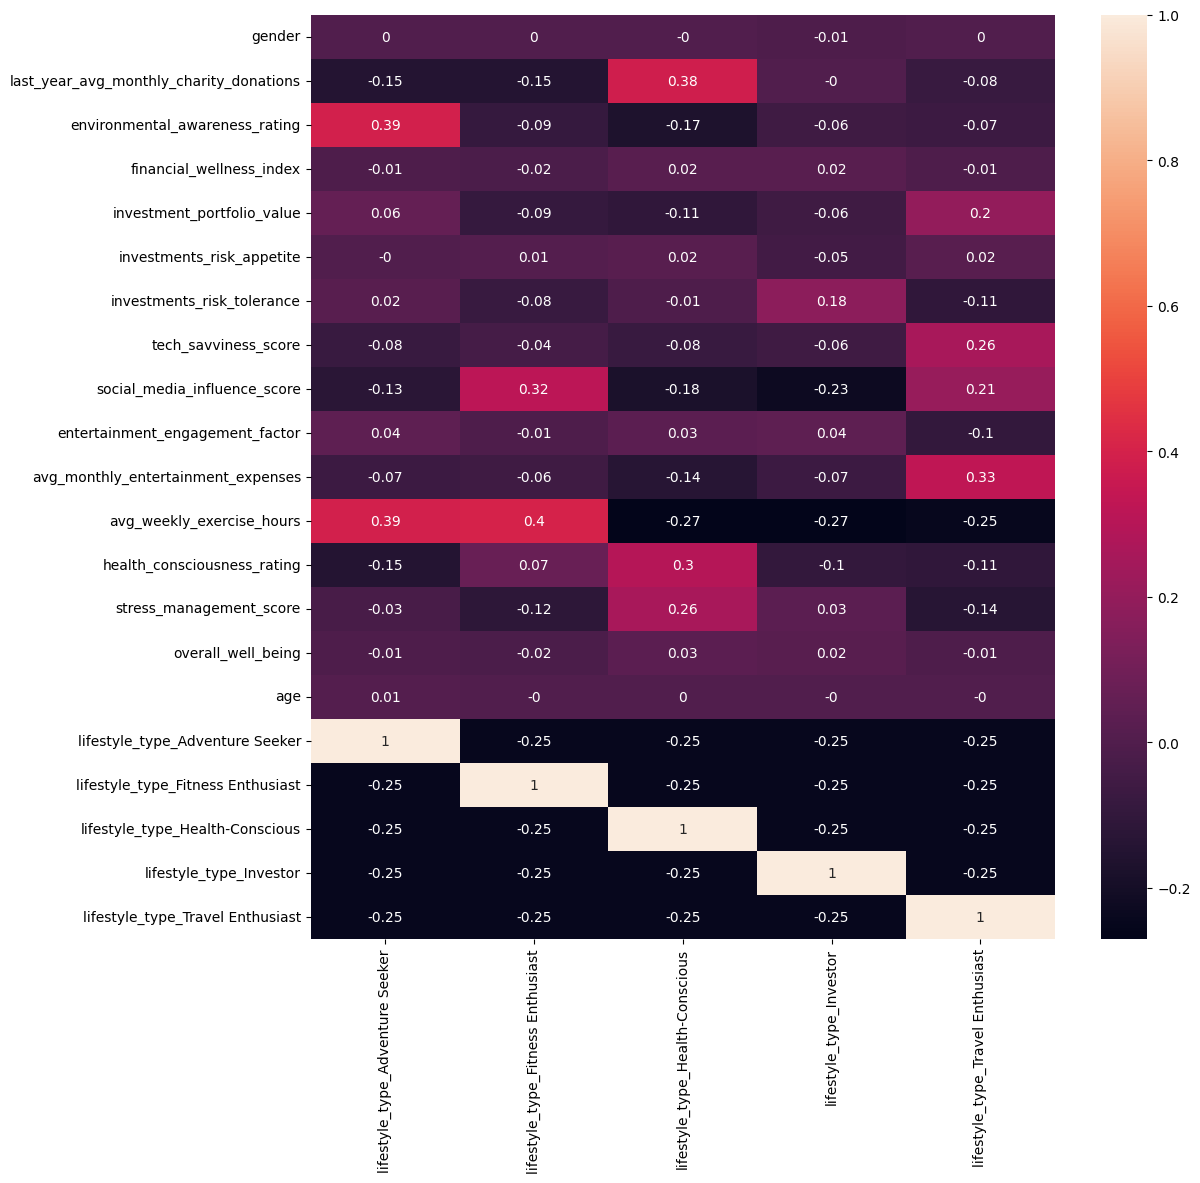

In [ ]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(train_corr[['lifestyle_type_Adventure Seeker','lifestyle_type_Fitness Enthusiast','lifestyle_type_Health-Conscious','lifestyle_type_Investor','lifestyle_type_Travel Enthusiast']].round(2) , annot=True)
plt.show()

By the above heatmap we can see that none of the variables are highly correlated with the target variable.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89961 entries, 1 to 90165
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   name                                     89961 non-null  object        
 1   gender                                   89961 non-null  int32         
 2   date_of_birth                            89961 non-null  datetime64[ns]
 3   last_year_avg_monthly_charity_donations  87713 non-null  float64       
 4   environmental_awareness_rating           86363 non-null  float64       
 5   financial_wellness_index                 88163 non-null  float64       
 6   investment_portfolio_value               88160 non-null  float64       
 7   investments_risk_appetite                88611 non-null  float64       
 8   investments_risk_tolerance               86813 non-null  float64       
 9   tech_savviness_score                     868

In [ ]:
train_values = train.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18]]

In [ ]:
cor_pearson = train_values.corr()
cor_pearson

,gender,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,age
gender,1.000000,-0.003971,0.003208,-0.006134,0.000520,0.001049,-0.003620,0.002222,0.001621,-0.000874,-0.003401,0.002661,-0.006025,-0.001926,-0.005942,0.004444
last_year_avg_monthly_charity_donations,-0.003971,1.000000,0.034043,-0.066111,0.054354,0.032717,0.037593,-0.017202,-0.169074,0.012599,-0.132838,-0.230312,0.228018,0.260928,-0.061136,-0.002574
environmental_awareness_rating,0.003208,0.034043,1.000000,-0.139695,0.143515,0.029223,0.082269,0.029190,-0.152905,0.096891,-0.066750,0.226875,-0.196919,0.038219,-0.144342,0.007911
financial_wellness_index,-0.006134,-0.066111,-0.139695,1.000000,0.102778,-0.038078,0.030438,-0.011094,-0.165925,-0.042188,0.043455,-0.056142,0.072287,-0.045489,0.999644,0.002781
investment_portfolio_value,0.000520,0.054354,0.143515,0.102778,1.000000,0.010432,0.028793,0.075705,-0.142069,-0.003471,0.073761,-0.054509,-0.064134,-0.034583,0.102441,0.005862
investments_risk_appetite,0.001049,0.032717,0.029223,-0.038078,0.010432,1.000000,0.441116,0.050555,-0.014854,0.029311,0.012759,-0.041321,-0.013543,0.033725,-0.037830,0.004468
investments_risk_tolerance,-0.003620,0.037593,0.082269,0.030438,0.028793,0.441116,1.000000,-0.089176,-0.265870,0.031786,0.078047,0.002876,-0.039251,0.002879,0.028410,0.002678
tech_savviness_score,0.002222,-0.017202,0.029190,-0.011094,0.075705,0.050555,-0.089176,1.000000,0.049333,0.049552,0.070791,-0.069108,-0.074381,0.015380,0.001685,-0.002159
social_media_influence_score,0.001621,-0.169074,-0.152905,-0.165925,-0.142069,-0.014854,-0.265870,0.049333,1.000000,0.177824,0.145641,0.104075,-0.027514,0.034445,-0.165609,-0.004338
entertainment_engagement_factor,-0.000874,0.012599,0.096891,-0.042188,-0.003471,0.029311,0.031786,0.049552,0.177824,1.000000,0.498493,-0.029405,-0.100977,0.777570,-0.043560,0.000482


<Axes: >

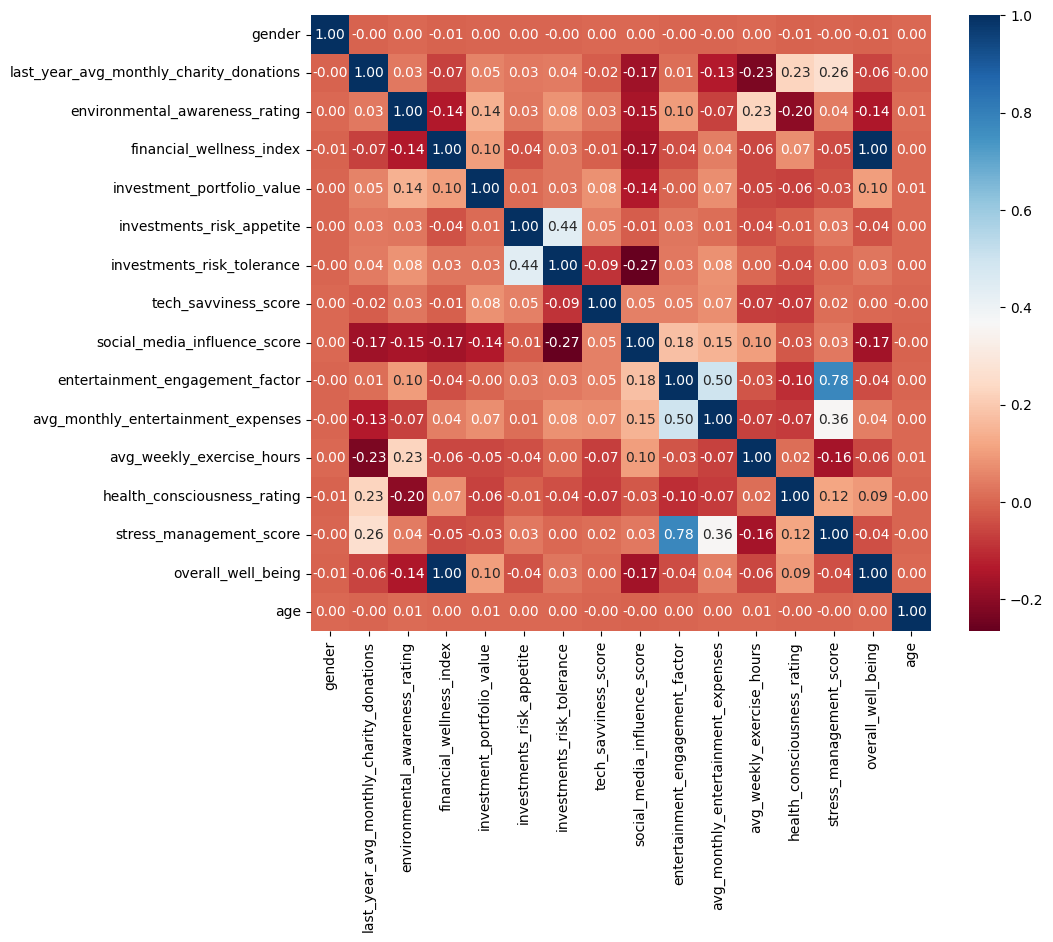

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=cor_pearson, annot=True, cmap = plt.cm.RdBu, fmt='.2f')

When analysing the correlation between variables, the variable overall well being and finantial wellness index are very highly correlated which can overfit the model. The variables stress management score and entertainment engagement factor has a considerable high correlation which can also lead to overfit.

## <font color='#BFD72F'> 2.7 Treating Outliers </font>


When checking how many outliers we could delete, we realized if we relied on the results from the boxplots and histograms, we would have deleted way more than 3%. We decided to only delete the outliers from the variables 'entertainment_engagement_factor' and 'overall_well_being', in order to maintaing an appropriate percetage of values.
Anyhow, we decided to keep the code for removing the remaining outliers as code, in case we wanted to change something for the final delivery.

In [ ]:
train.shape

(89961, 19)

In [ ]:
train.isna().sum()

name                                          0
gender                                        0
date_of_birth                                 0
last_year_avg_monthly_charity_donations    2248
environmental_awareness_rating             3598
financial_wellness_index                   1798
investment_portfolio_value                 1801
investments_risk_appetite                  1350
investments_risk_tolerance                 3148
tech_savviness_score                       3145
social_media_influence_score               2247
entertainment_engagement_factor             902
avg_monthly_entertainment_expenses          901
avg_weekly_exercise_hours                  2696
health_consciousness_rating                 899
stress_management_score                    3598
overall_well_being                          896
lifestyle_type                                0
age                                           0
dtype: int64

In [ ]:
train = train[(train["entertainment_engagement_factor"] <= 3.5 )]


In [ ]:
train = train[(train["overall_well_being"] <= 500 )]


The following we didn't remove as we would lost a lot of records

In [ ]:
#train = train[(train["investment_portfolio_value"] <= 400 )]


In [ ]:
#train = train[(train["investments_risk_appetite"] <= 10 )]


In [ ]:
#train = train[(train["investments_risk_tolerance"] <= 40 )]


In [ ]:
#train = train[(train["tech_savviness_score"] <= 28 )]


In [ ]:
#train = train[(train["social_media_influence_score"] <= 40 )]


In [ ]:
train.shape

(87994, 19)

In [ ]:
train.isna().sum()

name                                          0
gender                                        0
date_of_birth                                 0
last_year_avg_monthly_charity_donations    2194
environmental_awareness_rating             3535
financial_wellness_index                   1755
investment_portfolio_value                 1770
investments_risk_appetite                  1323
investments_risk_tolerance                 3079
tech_savviness_score                       3083
social_media_influence_score               2210
entertainment_engagement_factor               0
avg_monthly_entertainment_expenses          874
avg_weekly_exercise_hours                  2647
health_consciousness_rating                 879
stress_management_score                    3542
overall_well_being                            0
lifestyle_type                                0
age                                           0
dtype: int64

## <font color='#BFD72F'> 2.8 Treating Missing Values </font>


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87994 entries, 1 to 90164
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   name                                     87994 non-null  object        
 1   gender                                   87994 non-null  int32         
 2   date_of_birth                            87994 non-null  datetime64[ns]
 3   last_year_avg_monthly_charity_donations  85800 non-null  float64       
 4   environmental_awareness_rating           84459 non-null  float64       
 5   financial_wellness_index                 86239 non-null  float64       
 6   investment_portfolio_value               86224 non-null  float64       
 7   investments_risk_appetite                86671 non-null  float64       
 8   investments_risk_tolerance               84915 non-null  float64       
 9   tech_savviness_score                     849

In [ ]:
# Dropping the rows that have less than 17 non-null values
train = train.dropna(thresh = 17)

In [ ]:
train.shape

(87731, 19)

In [ ]:
#Checking the number of NA's of each variable
train.isna().sum()

name                                          0
gender                                        0
date_of_birth                                 0
last_year_avg_monthly_charity_donations    2125
environmental_awareness_rating             3443
financial_wellness_index                   1698
investment_portfolio_value                 1720
investments_risk_appetite                  1285
investments_risk_tolerance                 2995
tech_savviness_score                       2996
social_media_influence_score               2150
entertainment_engagement_factor               0
avg_monthly_entertainment_expenses          838
avg_weekly_exercise_hours                  2569
health_consciousness_rating                 844
stress_management_score                    3426
overall_well_being                            0
lifestyle_type                                0
age                                           0
dtype: int64

In [ ]:
# Checking the percentage of NA's of each variable
train.isna().sum()/len(train)*100

name                                       0.000000
gender                                     0.000000
date_of_birth                              0.000000
last_year_avg_monthly_charity_donations    2.422177
environmental_awareness_rating             3.924496
financial_wellness_index                   1.935462
investment_portfolio_value                 1.960538
investments_risk_appetite                  1.464705
investments_risk_tolerance                 3.413845
tech_savviness_score                       3.414984
social_media_influence_score               2.450673
entertainment_engagement_factor            0.000000
avg_monthly_entertainment_expenses         0.955193
avg_weekly_exercise_hours                  2.928269
health_consciousness_rating                0.962032
stress_management_score                    3.905119
overall_well_being                         0.000000
lifestyle_type                             0.000000
age                                        0.000000
dtype: float

### Treating Missing Values replacing NA's with 0 value

In [ ]:
# replacing the "last_year_avg_monthly_charity_donations" NA's with 0 value
train['last_year_avg_monthly_charity_donations'].fillna(0, inplace=True)

### Treating Missing Values with KNN

####KNN financial_wellness_index

In [ ]:
# splitting the data

# the data that contain NA's in the "financial_wellness_index"
missing_data_fwi = train[train['financial_wellness_index'].isnull()]
# the data that doesn't contain NA's in the "financial_wellness_index"
complete_data_fwi = train.dropna(subset=['financial_wellness_index'])

In [ ]:
# Defining the feature and the target variables
feature_column_fwi = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','investment_portfolio_value','investments_risk_appetite',
                      'investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                      'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']
target_column_fwi = 'financial_wellness_index'

In [ ]:
#Picking the feature column in the complete data
X_train_fwi = complete_data_fwi[feature_column_fwi]
#Picking the target column in the complete data
y_train_fwi = complete_data_fwi[target_column_fwi]

In [ ]:
X_train_fwi.shape

(86033, 13)

In [ ]:
#To get the optimal K it was chosen the square root of the number of samples
86033**(1/2)

293.3138251088755

In [ ]:
# Defining the optimal K as the square root of the number of samples
k = 293

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_train_fwi)

KNNImputer(n_neighbors=293)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_fwi = missing_data_fwi[feature_column_fwi]

In [ ]:
#Predicting the missing values
y_missing_predicted_fwi = knn_imputer.transform(X_missing_fwi)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_fwi[target_column_fwi] = y_missing_predicted_fwi

In [ ]:
#Joining the data of the predicted values with the data that had already the values
train = pd.concat([complete_data_fwi, missing_data_fwi])

####KNN investment_portfolio_value

In [ ]:
# splitting the data

# the data that contain NA's in the "investment_portfolio_value"
missing_data_ipv = train[train['investment_portfolio_value'].isnull()]
# the data that doesn't contain NA's in the "investment_portfolio_value"
complete_data_ipv = train.dropna(subset=['investment_portfolio_value'])

In [ ]:
# Defining the feature and the target variables
feature_columns_ipv = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investments_risk_appetite',
                       'investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                      'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']
target_column_ipv = 'investment_portfolio_value'

In [ ]:
#Picking the feature column in the complete data
X_train_ipv = complete_data_ipv[feature_columns_ipv]
#Picking the target column in the complete data
y_train_ipv = complete_data_ipv[target_column_ipv]

In [ ]:
# Defining the optimal K as the square root of the number of samples
k = 293

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_train_ipv)

KNNImputer(n_neighbors=293)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_ipv = missing_data_ipv[feature_columns_ipv]

In [ ]:
#Predicting the missing values
y_missing_predicted_ipv = knn_imputer.transform(X_missing_ipv)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_ipv[target_column_ipv] = y_missing_predicted_ipv

In [ ]:
#Joining the data of the predicted values with the data that had already the values
train = pd.concat([complete_data_ipv, missing_data_ipv])

#### KNN investments_risk_appetite

In [ ]:
# splitting the data

# the data that contain NA's in the "investments_risk_appetite"
missing_data_ira = train[train['investments_risk_appetite'].isnull()]
# the data that doesn't contain NA's in the "investments_risk_appetite"
complete_data_ira = train.dropna(subset=['investments_risk_appetite'])

In [ ]:
# Defining the feature and the target variables
feature_columns_ira = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investment_portfolio_value',
                      'investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                      'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']
target_column_ira = 'investments_risk_appetite'

In [ ]:
#Picking the feature column in the complete data
X_train_ira = complete_data_ira[feature_columns_ira]
#Picking the target column in the complete data
y_train_ira = complete_data_ira[target_column_ira]

In [ ]:
# Defining the optimal K as the square root of the number of samples
k = 293

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_train_ira)

KNNImputer(n_neighbors=293)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_ira = missing_data_ira[feature_columns_ira]

In [ ]:
#Predicting the missing values
y_missing_predicted_ira = knn_imputer.transform(X_missing_ira)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_ira[target_column_ira] = y_missing_predicted_ira

In [ ]:
#Joining the data of the predicted values with the data that had already the values
train = pd.concat([complete_data_ira, missing_data_ira])

####KNN investments_risk_tolerance

In [ ]:
# splitting the data

# the data that contain NA's in the "investments_risk_tolerance"
missing_data_irt = train[train['investments_risk_tolerance'].isnull()]
# the data that doesn't contain NA's in the "investments_risk_tolerance"
complete_data_irt = train.dropna(subset=['investments_risk_tolerance'])

In [ ]:
# Defining the feature and the target variables
feature_columns_irt = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investment_portfolio_value',
                      'investments_risk_appetite','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                      'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']
target_column_irt = 'investments_risk_tolerance'

In [ ]:
#Picking the feature column in the complete data
X_train_irt = complete_data_irt[feature_columns_irt]
#Picking the target column in the complete data
y_train_irt = complete_data_irt[target_column_irt]

In [ ]:
# Defining the optimal K as the square root of the number of samples
k = 293

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_train_irt)

KNNImputer(n_neighbors=293)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_irt = missing_data_irt[feature_columns_irt]

In [ ]:
#Predicting the missing values
y_missing_predicted_irt = knn_imputer.transform(X_missing_irt)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_irt[target_column_irt] = y_missing_predicted_irt

In [ ]:
#Joining the data of the predicted values with the data that had already the values
train = pd.concat([complete_data_irt, missing_data_irt])

####KNN avg_monthly_entertainment_expenses

In [ ]:
# splitting the data

# the data that contain NA's in the "avg_monthly_entertainment_expenses"
missing_data_amee = train[train['avg_monthly_entertainment_expenses'].isnull()]
# the data that doesn't contain NA's in the "avg_monthly_entertainment_expenses"
complete_data_amee = train.dropna(subset=['avg_monthly_entertainment_expenses'])

In [ ]:
# Defining the feature and the target variables
feature_columns_amee = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investment_portfolio_value',
                      'investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                      'avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']
target_column_amee = 'avg_monthly_entertainment_expenses'

In [ ]:
#Picking the feature column in the complete data
X_train_amee = complete_data_amee[feature_columns_amee]
#Picking the target column in the complete data
y_train_amee = complete_data_amee[target_column_amee]

In [ ]:
# Defining the optimal K as the square root of the number of samples
k = 293

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_train_amee)

KNNImputer(n_neighbors=293)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_amee = missing_data_amee[feature_columns_amee]

In [ ]:
#Predicting the missing values
y_missing_predicted_amee = knn_imputer.transform(X_missing_amee)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_amee[target_column_amee] = y_missing_predicted_amee

In [ ]:
#Joining the data of the predicted values with the data that had already the values
train = pd.concat([complete_data_amee, missing_data_amee])

####KNN stress_management_score

In [ ]:
# splitting the data

# the data that contain NA's in the "stress_management_score"
missing_data_sms = train[train['stress_management_score'].isnull()]
# the data that doesn't contain NA's in the "stress_management_score"
complete_data_sms = train.dropna(subset=['stress_management_score'])

In [ ]:
# Defining the feature and the target variables
feature_columns_sms = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investment_portfolio_value',
                      'investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                      'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','overall_well_being']
target_column_sms = 'stress_management_score'

In [ ]:
#Picking the feature column in the complete data
X_train_sms = complete_data_sms[feature_columns_sms]
#Picking the target column in the complete data
y_train_sms = complete_data_sms[target_column_sms]

In [ ]:
# Defining the optimal K as the square root of the number of samples
k = 293

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_train_sms)

KNNImputer(n_neighbors=293)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_sms = missing_data_sms[feature_columns_sms]

In [ ]:
#Predicting the missing values
y_missing_predicted_sms = knn_imputer.transform(X_missing_sms)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_sms[target_column_sms] = y_missing_predicted_sms

In [ ]:
#Joining the data of the predicted values with the data that had already the values
train = pd.concat([complete_data_sms, missing_data_sms])

### Treating Missing Values replacing by the median

In [ ]:
# replacing the "avg_weekly_exercise_hours" NA's with the median value
train['avg_weekly_exercise_hours'] = train['avg_weekly_exercise_hours'].fillna(train['avg_weekly_exercise_hours'].median())

In [ ]:
# replacing the "tech_savviness_score" NA's with the median value
train['tech_savviness_score'] = train['tech_savviness_score'].fillna(train['tech_savviness_score'].median())


In [ ]:
# replacing the "social_media_influence_score" NA's with the median value
train['social_media_influence_score'] = train['social_media_influence_score'].fillna(train['social_media_influence_score'].median())


In [ ]:
# replacing the "health_consciousness_rating" NA's with the median value
train['health_consciousness_rating'] = train['health_consciousness_rating'].fillna(train['health_consciousness_rating'].median())

In [ ]:
# replacing the "environmental_awareness_rating" NA's with the median value
train['environmental_awareness_rating'] = train['environmental_awareness_rating'].fillna(train['environmental_awareness_rating'].median())


## <font color='#BFD72F'> 2.9 Feature Engineering </font>







### Combining tech savviness score and social media influence score to create the variable online presence.

This new variable provides a measure of an individual's overall digital presence. It reflects both their capacity to utilize technology and their ability to influence and engage with an online audience.

In [ ]:
# We are creating custom bins for tech_savviness_score
tech_bins = [0, 10, 15, 20, 100000000]  # Custom bins for tech_savviness_score
tech_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']  # Labels for each bin

# We are also creating custom bins for social_media_influence_score
smi_bins = [0, 10, 20, 30, 100000000]  # Custom bins for social_media_influence_score
smi_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']  # Labels for each bin

# Using numpy.digitize() to create the tech_savviness_bin column
train['tech_savviness_bin'] = np.digitize(train['tech_savviness_score'], tech_bins)
train['tech_savviness_bin'] = train['tech_savviness_bin'].replace({1: 'Low', 2: 'Medium-Low', 3: 'Medium-High', 4: 'High'})

# Using numpy.digitize() to create the social_media_influence_bin column
train['social_media_influence_bin'] = np.digitize(train['social_media_influence_score'], smi_bins)
train['social_media_influence_bin'] = train['social_media_influence_bin'].replace({1: 'Low', 2: 'Medium-Low', 3: 'Medium-High', 4: 'High'})

# And calculating composite_score with equal weights, since they are equaly important (50% for each)
train['online_presence'] = 0.5 * train['tech_savviness_score'] + 0.5 * train['social_media_influence_score']

print(train[['tech_savviness_bin', 'social_media_influence_bin', 'online_presence']])

           tech_savviness_bin social_media_influence_bin  online_presence
citizen_id                                                               
5                 Medium-High                        Low          9.80505
7                  Medium-Low                 Medium-Low         12.41450
8                 Medium-High                        Low         12.00055
9                  Medium-Low                        Low         11.47375
11                 Medium-Low                        Low         11.10970
...                       ...                        ...              ...
56782              Medium-Low                 Medium-Low         14.67100
70862              Medium-Low                        Low         11.96965
72374              Medium-Low                        Low         11.14255
79590              Medium-Low                        Low         10.57740
83568              Medium-Low                        Low         10.70235

[87731 rows x 3 columns]


### Combine the financial wellness index, investment portfolio value, investments risk appetite, and investments risk tolerance into a single score representing each citizen's financial stability. Repeating the same steps we took for the variables before:

This new variable provides a comprehensive measure of the ability to manage investments risks. It can be used by institutions to identify individuals who are financially secure and those who might need support or guidance.

In [ ]:
# We are creating custom bins for financial_wellness_index
fw_bins = [0, 100, 200, 300, float('inf')]  # Custom bins for financial_wellness_index
fw_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']  # Labels for each bin

# We are also creating custom bins for investment_portfolio_value
ipv_bins = [0, 50, 100, 150, float('inf')]  # Custom bins for investment_portfolio_value
ipv_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']  # Labels for each bin

# Creating custom bins for investments_risk_appetite
risk_appetite_bins = [0, 2, 4, 6, 8, float('inf')]  # Custom bins for investments_risk_appetite
risk_appetite_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  # Labels for each bin

# Creating custom bins for investments_risk_tolerance
risk_tolerance_bins = [0, 5, 10, 15, 20, float('inf')]  # Custom bins for investments_risk_tolerance
risk_tolerance_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  # Labels for each bin

# Using numpy.digitize() to create the financial_wellness_bin column
train['financial_wellness_bin'] = np.digitize(train['financial_wellness_index'], fw_bins)
train['financial_wellness_bin'] = train['financial_wellness_bin'].replace({1: 'Low', 2: 'Medium-Low', 3: 'Medium-High', 4: 'High'})

# Using numpy.digitize() to create the investment_portfolio_bin column
train['investment_portfolio_bin'] = np.digitize(train['investment_portfolio_value'], ipv_bins)
train['investment_portfolio_bin'] = train['investment_portfolio_bin'].replace({1: 'Low', 2: 'Medium-Low', 3: 'Medium-High', 4: 'High'})

# Using numpy.digitize() to create the risk_appetite_bin column
train['risk_appetite_bin'] = np.digitize(train['investments_risk_appetite'], risk_appetite_bins)
train['risk_appetite_bin'] = train['risk_appetite_bin'].replace({1: 'Very Low', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very High'})

# Using numpy.digitize() to create the risk_tolerance_bin column
train['risk_tolerance_bin'] = np.digitize(train['investments_risk_tolerance'], risk_tolerance_bins)
train['risk_tolerance_bin'] = train['risk_tolerance_bin'].replace({1: 'Very Low', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very High'})

# And calculating financial_stability with equal weights (25% each)
train['financial_stability'] = (
    0.25 * train['financial_wellness_index'] +
    0.25 * train['investment_portfolio_value'] +
    0.25 * train['investments_risk_appetite'] +
    0.25 * train['investments_risk_tolerance']
)

print(train[['financial_wellness_bin', 'investment_portfolio_bin', 'risk_appetite_bin', 'risk_tolerance_bin', 'financial_stability']])


           financial_wellness_bin investment_portfolio_bin risk_appetite_bin  \
citizen_id                                                                     
5                     Medium-High              Medium-High            Medium   
7                             Low                      Low              High   
8                             Low                      Low            Medium   
9                             Low                      Low               Low   
11                            Low                      Low              High   
...                           ...                      ...               ...   
56782                         Low                      Low              High   
70862                  Medium-Low                      Low               Low   
72374                  Medium-Low                      Low          Very Low   
79590                         Low                      Low            Medium   
83568                  Medium-Low       

#### MinMax Scaling

 Using MinMax scaller since most of our data isn't normally distributed.

In [ ]:
# Create a RobustScaler object
robust_scaler = RobustScaler()

# Fit the RobustScaler to your selected columns and transform them
train[['last_year_avg_monthly_charity_donations', 'environmental_awareness_rating', 'investment_portfolio_value','investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being','online_presence','financial_stability']] = robust_scaler.fit_transform(train[['last_year_avg_monthly_charity_donations', 'environmental_awareness_rating', 'investment_portfolio_value','investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being','online_presence','financial_stability']])

# Create a MinMaxScaler object with the desired range
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply MinMax scaling to the robust scaled columns
train[['last_year_avg_monthly_charity_donations', 'environmental_awareness_rating', 'investment_portfolio_value','investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being','online_presence','financial_stability']] = min_max_scaler.fit_transform(train[['last_year_avg_monthly_charity_donations', 'environmental_awareness_rating', 'investment_portfolio_value','investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being','online_presence','financial_stability']])

### Combine investments risk appetite and investments risk tolerance to categorize each citizen into a risk profile category.

The variable risk_profile_category encapsulates an individual’s overall risk preference in the context of investment decisions

In [ ]:
# Calculate average , by calculating the average of both scaled variables
average_risk = (train['investments_risk_appetite'] + train['investments_risk_tolerance']) / 2

# Use numpy.digitize() to map average to risk profile categories
train['risk_profile_category'] = np.digitize(average_risk, bins=[0, 0.2, 0.4, 0.6, 0.8, 1])
train['risk_profile_category'] = train['risk_profile_category'].replace({1: 'Risk averse', 2: 'Cautious', 3: 'Moderate', 4: 'Risk taker', 5: 'Risk lover'})
train.tail()

,name,gender,date_of_birth,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,...,age,tech_savviness_bin,social_media_influence_bin,online_presence,financial_wellness_bin,investment_portfolio_bin,risk_appetite_bin,risk_tolerance_bin,financial_stability,risk_profile_category
citizen_id,,,,,,,,,,,,,,,,,,,,,
56782,Isabel,1,1986-08-24,0.0,0.19599,99.5266,0.043651,0.652696,0.143114,0.333767,...,37,Medium-Low,Medium-Low,0.403577,Low,Low,High,Low,0.221238,Cautious
70862,Ramon,0,2001-03-26,0.0,0.07313,185.1920,0.020128,0.310925,0.094048,0.336911,...,23,Medium-Low,Low,0.294798,Medium-Low,Low,Low,Very Low,0.336303,Cautious
72374,Tatiana,1,1988-02-27,0.0,0.04986,104.0160,0.012757,0.088008,0.135163,0.260028,...,36,Medium-Low,Low,0.261492,Medium-Low,Low,Very Low,Low,0.193690,Risk averse
79590,Iida,1,1983-05-04,0.0,0.34523,29.3110,0.001119,0.471841,0.167988,0.307130,...,41,Medium-Low,Low,0.238734,Low,Low,Medium,Low,0.070331,Cautious
83568,Michèle,1,2000-01-21,0.0,0.17773,100.2800,0.028312,0.254442,0.082434,0.234799,...,24,Medium-Low,Low,0.243765,Medium-Low,Low,Low,Very Low,0.198520,Risk averse


In [ ]:
train['risk_profile_category'].value_counts()


Cautious       38548
Risk averse    33159
Moderate       15859
Risk taker       164
Risk lover         1
Name: risk_profile_category, dtype: int64

# <font color='#BFD72F'> 3. Train-Validation Split (80%-20%)</font>

In [ ]:
train = train.drop('financial_wellness_index', axis=1)

We drop 'financial_wellness_index' because it has correlation equal to 1 with the variable 'overall_well_being'

In [ ]:
train = train.drop('entertainment_engagement_factor', axis=1)

We drop 'entertainment_engagement_factor' because it has high correlation with the variable 'stress_management_score'

In [ ]:
train_split = train.drop(['name','date_of_birth','tech_savviness_bin','social_media_influence_bin','financial_wellness_bin','investment_portfolio_bin','risk_appetite_bin','risk_tolerance_bin','risk_profile_category'], axis=1)

We drop the categorical variables

In [ ]:
X = train_split.drop('lifestyle_type', axis = 1)
y = train_split['lifestyle_type']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_split.head()

,gender,last_year_avg_monthly_charity_donations,environmental_awareness_rating,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,lifestyle_type,age,online_presence,financial_stability
citizen_id,,,,,,,,,,,,,,,,,
5,0,0.0,0.05943,0.331699,0.480539,0.092398,0.380849,0.083868,0.079457,0.000000,0.06718,0.290571,0.533634,Adventure Seeker,36,0.207632,0.690362
7,1,0.0,0.06770,0.023565,0.541022,0.177394,0.173862,0.308438,0.233050,0.476521,0.33746,0.329001,0.208528,Fitness Enthusiast,20,0.312711,0.203184
8,1,0.0,0.07021,0.049512,0.388240,0.121547,0.391934,0.175709,0.103876,0.005565,0.18277,0.273497,0.203320,Travel Enthusiast,45,0.296042,0.209407
9,0,0.0,0.06720,0.023667,0.205679,0.102996,0.280679,0.210600,0.059769,0.231374,0.06649,0.349392,0.202983,Fitness Enthusiast,28,0.274829,0.190268
11,0,0.4,0.07115,0.001119,0.576474,0.118182,0.279950,0.194790,0.032205,0.042031,0.15250,0.414114,0.141858,Health-Conscious,24,0.260169,0.129592


# <font color='#BFD72F'> 4. Feature Selection</font>

## <font color='#BFD72F'> 4.1 Wrapper Method (RFE) </font>


In [ ]:
train.head()

,name,gender,date_of_birth,last_year_avg_monthly_charity_donations,environmental_awareness_rating,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,...,age,tech_savviness_bin,social_media_influence_bin,online_presence,financial_wellness_bin,investment_portfolio_bin,risk_appetite_bin,risk_tolerance_bin,financial_stability,risk_profile_category
citizen_id,,,,,,,,,,,,,,,,,,,,,
5,Virgínio,0,1987-07-29,0.0,0.05943,0.331699,0.480539,0.092398,0.380849,0.083868,...,36,Medium-High,Low,0.207632,Medium-High,Medium-High,Medium,Very Low,0.690362,Cautious
7,Eugenia,1,2004-05-11,0.0,0.06770,0.023565,0.541022,0.177394,0.173862,0.308438,...,20,Medium-Low,Medium-Low,0.312711,Low,Low,High,Low,0.203184,Cautious
8,Ishita,1,1979-01-25,0.0,0.07021,0.049512,0.388240,0.121547,0.391934,0.175709,...,45,Medium-High,Low,0.296042,Low,Low,Medium,Low,0.209407,Cautious
9,Jordi,0,1995-09-10,0.0,0.06720,0.023667,0.205679,0.102996,0.280679,0.210600,...,28,Medium-Low,Low,0.274829,Low,Low,Low,Very Low,0.190268,Risk averse
11,Aleksi,0,1999-07-10,0.4,0.07115,0.001119,0.576474,0.118182,0.279950,0.194790,...,24,Medium-Low,Low,0.260169,Low,Low,High,Low,0.129592,Cautious


In [ ]:
data = train.drop(['lifestyle_type', 'name','date_of_birth','tech_savviness_bin','social_media_influence_bin','financial_wellness_bin','investment_portfolio_bin','risk_appetite_bin','risk_tolerance_bin','risk_profile_category'], axis=1)

In [ ]:
target = train['lifestyle_type']

In [ ]:
model = LogisticRegression()

In [ ]:
rfe = RFE(estimator = model, n_features_to_select = 10)

In [ ]:
X_rfe = rfe.fit_transform(X = data, y = target)
X_rfe


array([[0.        , 0.05943   , 0.33169899, ..., 0.06718   , 0.29057114,
        0.20763249],
       [0.        , 0.0677    , 0.02356523, ..., 0.33746   , 0.32900131,
        0.31271116],
       [0.        , 0.07021   , 0.04951238, ..., 0.18277   , 0.27349703,
        0.29604201],
       ...,
       [0.        , 0.04986   , 0.01275729, ..., 0.08538   , 0.        ,
        0.26149163],
       [0.        , 0.34523   , 0.0011189 , ..., 0.07501   , 0.        ,
        0.23873388],
       [0.        , 0.17773   , 0.02831162, ..., 0.02654   , 0.        ,
        0.24376543]])

In [ ]:
rfe.support_

array([False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False])

In [ ]:
train_num = ['gender', 'last_year_avg_monthly_charity_donations', 'environmental_awareness_rating', 'investment_portfolio_value', 'investments_risk_appetite', 'investments_risk_tolerance', 'tech_savviness_score', 'social_media_influence_score', 'avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours', 'health_consciousness_rating', 'stress_management_score', 'overall_well_being', 'age', 'financial_stability', 'online_presence']

In [ ]:
rfe.ranking_

array([6, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 3, 7, 1, 5])

In [ ]:
selected_features = pd.Series(rfe.support_, index = data.columns)
selected_features

gender                                     False
last_year_avg_monthly_charity_donations     True
environmental_awareness_rating              True
investment_portfolio_value                  True
investments_risk_appetite                  False
investments_risk_tolerance                 False
tech_savviness_score                        True
social_media_influence_score                True
avg_monthly_entertainment_expenses          True
avg_weekly_exercise_hours                   True
health_consciousness_rating                 True
stress_management_score                     True
overall_well_being                         False
age                                        False
online_presence                             True
financial_stability                        False
dtype: bool

## <font color='#BFD72F'> 4.2 Wrapper Method (RFE 2.0) </font>


In [ ]:
feature_scaler = MinMaxScaler().fit(X_train)

In [ ]:
#scale X_train and X_test using feature_scaler
X_train_scaled = pd.DataFrame(feature_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(feature_scaler.transform(X_val), columns= X_val.columns, index=X_val.index)

In [ ]:
# selecting the numerical variables
train_num = ['gender', 'last_year_avg_monthly_charity_donations', 'environmental_awareness_rating', 'investment_portfolio_value', 'investments_risk_appetite', 'investments_risk_tolerance', 'tech_savviness_score', 'social_media_influence_score', 'avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours', 'health_consciousness_rating', 'stress_management_score', 'overall_well_being', 'age', 'financial_stability', 'online_presence']

In [ ]:
from sklearn.metrics import f1_score

# Number of features to keep
nof_list=np.arange(2,17)
high_score=0
# Variable to store the optimum features
nof=0

#list of scores
score_list =[]

for n in range(len(nof_list)):
    model = LogisticRegression()

    #create instance of RFE
    rfe = RFE(model,n_features_to_select = nof_list[n])

    #fit RFE to training data
    X_train_rfe = rfe.fit_transform(X_train_scaled[train_num],y_train)

    #apply the same RFE transformation to the test data
    X_val_rfe = rfe.transform(X_val_scaled[train_num])

    #create and train instance of Logistic Regression
    model.fit(X_train_rfe,y_train)

    #predict
    y_pred = model.predict(X_val_rfe)

    #store f1score in variable
    f_score = f1_score(y_val, y_pred, average='weighted')

    score_list.append(f_score)

    #compare against previous best performance
    if(f_score > high_score):
        high_score = f_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 13
Score with 13 features: 0.617875


In [ ]:
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = nof)


In [ ]:
#fit RFE to your training data - metric features only
X_rfe = rfe.fit_transform(X = X_train_scaled[train_num], y = y_train)

# Create an object `selected_features` that will shows which features to keep and which features to throw away
selected_features = pd.Series(rfe.support_, index = X_train_scaled[train_num].columns)
selected_features

gender                                     False
last_year_avg_monthly_charity_donations     True
environmental_awareness_rating              True
investment_portfolio_value                  True
investments_risk_appetite                   True
investments_risk_tolerance                  True
tech_savviness_score                        True
social_media_influence_score                True
avg_monthly_entertainment_expenses          True
avg_weekly_exercise_hours                   True
health_consciousness_rating                 True
stress_management_score                     True
overall_well_being                          True
age                                        False
financial_stability                        False
online_presence                             True
dtype: bool

In [ ]:
selected_columns = selected_features[selected_features].index
selected_columns

Index(['last_year_avg_monthly_charity_donations',
       'environmental_awareness_rating', 'investment_portfolio_value',
       'investments_risk_appetite', 'investments_risk_tolerance',
       'tech_savviness_score', 'social_media_influence_score',
       'avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours',
       'health_consciousness_rating', 'stress_management_score',
       'overall_well_being', 'online_presence'],
      dtype='object')

In [ ]:
X_train_scaled.head()

,gender,last_year_avg_monthly_charity_donations,environmental_awareness_rating,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,age,online_presence,financial_stability
citizen_id,,,,,,,,,,,,,,,,
26160,0.0,0.0,0.29978,0.029439,0.496517,0.000000,0.193276,0.115416,0.000000,0.354452,0.07025,0.540072,0.213577,0.079365,0.157151,0.201314
49555,1.0,0.0,0.05767,0.004235,0.587135,0.307620,0.236602,0.168528,0.056524,0.037465,0.05788,0.403951,0.197888,0.222222,0.225082,0.193701
14247,1.0,0.0,0.06507,0.071717,0.000000,0.110032,0.244614,0.086425,0.237300,0.021855,0.07247,0.446041,0.230874,0.190476,0.155127,0.244037
4750,1.0,0.0,0.06413,0.033231,0.566617,0.275665,0.202098,0.232405,0.147298,0.121262,0.07699,0.306036,0.198573,0.349206,0.266291,0.213475
64542,1.0,0.0,0.16770,0.021412,0.000000,0.144305,0.257158,0.051192,0.042457,0.286753,0.07697,0.200511,0.211890,0.380952,0.129365,0.193266


In [ ]:
#filter train data
X_train_scaled = X_train_scaled.loc[:,selected_columns]

#filter test data
X_val_scaled = X_val_scaled.loc[:,selected_columns]

# <font color='#BFD72F'> 5. Models</font>

## <font color='#BFD72F'> 5.1 Gaussian NB </font>


In [ ]:
modelNB = GaussianNB()

In [ ]:
modelNB.fit(X = X_train_scaled, y = y_train)

GaussianNB()

In [ ]:
labels_train = modelNB.predict(X_train_scaled)
labels_val = modelNB.predict(X_val_scaled)

In [ ]:
# Accuracy for train set
modelNB.score(X_train_scaled, y_train)

0.6165222842813177

In [ ]:
# Accuracy for validation set
modelNB.score(X_val_scaled, y_val)

0.6113295720066109

In [ ]:
print("F1 Score between the y_train and labels_train:" + str(f1_score(y_train, labels_train, average='weighted')))
print("F1 Score between the y_val and labels_test:" + str(f1_score(y_val, labels_val, average='weighted')))

F1 Score between the y_train and labels_train:0.6159632171649052
F1 Score between the y_val and labels_test:0.6103412767834682


## <font color='#BFD72F'> 5.2 K-Nearest Neighbours Classifier </font>


In [ ]:
modelKNN = KNeighborsClassifier()

In [ ]:
modelKNN.fit(X = X_train_scaled, y = y_train)

KNeighborsClassifier()

In [ ]:
labels_train = modelKNN.predict(X_train_scaled)
labels_test = modelKNN.predict(X_val_scaled)

In [ ]:
modelKNN.score(X_train_scaled, y_train)

0.7755328849880314

In [ ]:
modelKNN.score(X_val_scaled, y_val)

0.6804581979825611

In [ ]:
print("F1 Score between the y_train and labels_train:" + str(f1_score(y_train, labels_train, average='weighted')))
print("F1 Score between the y_test and labels_test:" + str(f1_score(y_val, labels_test, average='weighted')))

F1 Score between the y_train and labels_train:0.7763342103989731
F1 Score between the y_test and labels_test:0.6814334060135905


In [ ]:
modelKNN.classes_

array(['Adventure Seeker', 'Fitness Enthusiast', 'Health-Conscious',
       'Investor', 'Travel Enthusiast'], dtype=object)

In [ ]:
modelKNN.effective_metric_

'euclidean'

In [ ]:
numberK_list=np.arange(1,21)
high_score=0
nof=0
score_list_train =[]
score_list_test =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled, y_train)

    #obtain predictions
    labels_train = model.predict(X_train_scaled)
    labels_test = model.predict(X_val_scaled)

    score_train = f1_score(y_train, labels_train, average='weighted')
    score_test = f1_score(y_val, labels_test, average='weighted')
    score_list_train.append(score_train)
    score_list_test.append(score_test)

    if(score_test>high_score):
        high_score = score_test
        nof = numberK_list[n]
print("Best number of neighbors: %d" %nof)
print("Mean F1-score in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean F1-score in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 14
Mean F1-score in train with 14 neighbors: 0.734176
Mean F1-score in validation with 14 neighbors: 0.692759


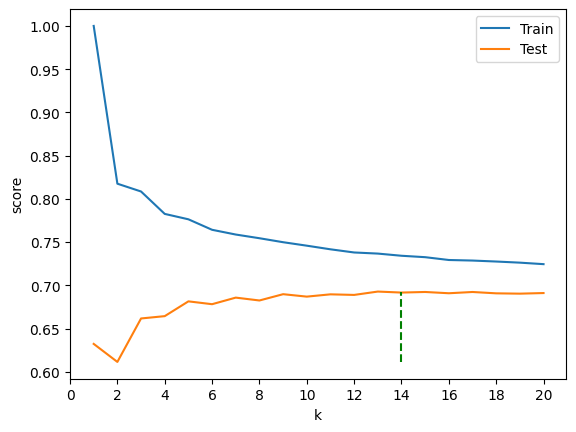

In [ ]:
plt.plot(numberK_list, score_list_train, label='Train')
plt.plot(numberK_list, score_list_test, label = 'Test')
plt.vlines(x=nof,ymax=high_score,ymin=min(score_list_test),ls='--',colors='g')
plt.xticks(numberK_list)
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.xticks(np.arange(0,21,2))
plt.show()

In [ ]:
modelKNN14 = KNeighborsClassifier(n_neighbors=14).fit(X = X_train_scaled, y = y_train)

labels_train = modelKNN14.predict(X_train_scaled)
labels_test = modelKNN14.predict(X_val_scaled)

print("F1 Score between the y_train and labels_train:" + str(f1_score(y_train, labels_train, average='weighted')))
print("F1 Score between the y_test and labels_test:" + str(f1_score(y_val, labels_test,average='weighted')))

F1 Score between the y_train and labels_train:0.7341755229429199
F1 Score between the y_test and labels_test:0.6916075775094969


## <font color='#BFD72F'> 5.3  Random Forest Classifier </font>


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Initialize the Random Forest Classifier
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
modelRF.fit(X_train_scaled, y_train)

# Predict on the validation data
labels_train = modelRF.predict(X_train_scaled)
y_pred = modelRF.predict(X_val_scaled)

# Calculate the F1 Score
print("F1 Score between the y_train and labels_train:" + str(f1_score(y_train, labels_train, average='weighted')))
print("F1 Score between y_val and y_pred: " + str(f1_score(y_val, y_pred, average='weighted')))


F1 Score between the y_train and labels_train:1.0
F1 Score between y_val and y_pred: 0.7637071929944337


## <font color='#BFD72F'> 5.4  Decision Tree </font>


In [ ]:
train_multiclass = train_split.loc[:,selected_columns]
target_multiclass = train_split['lifestyle_type']
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(train_multiclass,
                                                                                                target_multiclass,
                                                                                                test_size = 0.2,
                                                                                                stratify=target_multiclass,
                                                                                                random_state=5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()

In [ ]:
modelDT.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
train['lifestyle_type'].value_counts()

lifestyle_type
Health-Conscious      17650
Investor              17558
Adventure Seeker      17538
Fitness Enthusiast    17538
Travel Enthusiast     17447
Name: count, dtype: int64

In [ ]:
'''from sklearn import tree
import graphviz
# Process a decision tree graph using Graphviz
dot_data = tree.export_graphviz(modelDT,
                                out_file=None,
                                feature_names=train_multiclass.columns,
                                class_names=["Health-Conscious", "Investor","Adventure Seeker","Fitness Enthusiast","Travel Enthusiast"],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph'''

'from sklearn import tree\nimport graphviz\n# Process a decision tree graph using Graphviz\ndot_data = tree.export_graphviz(modelDT,\n                                out_file=None,\n                                feature_names=train_multiclass.columns,\n                                class_names=["Health-Conscious", "Investor","Adventure Seeker","Fitness Enthusiast","Travel Enthusiast"],\n                                filled=True,\n                                rounded=True,\n                                special_characters=True)\ngraph = graphviz.Source(dot_data)\ngraph'

In [ ]:
y_pred = modelDT.predict(X_val_scaled)

In [ ]:
modelDT.score(X_train_scaled, y_train)

1.0

In [ ]:
modelDT.score(X_val_scaled, y_val)

0.6566364620732889

### Attributes of the Decision Tree Classifier

In [ ]:
modelDT.feature_importances_

array([0.01006979, 0.06641929, 0.07108302, 0.04064333, 0.07107406,
       0.03679254, 0.0767809 , 0.0636175 , 0.18344747, 0.09766475,
       0.05404454, 0.12875397, 0.09960884])

In [ ]:
def plot_feature_importances(model,DF):
    n_features = DF.shape[1]
    plt.figure(figsize=(5,3))
    plt.barh(range(n_features), model.feature_importances_, color='yellowgreen')
    plt.yticks(np.arange(n_features), DF.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title('Feature Importance in Decision Tree Classifier')
    plt.show()

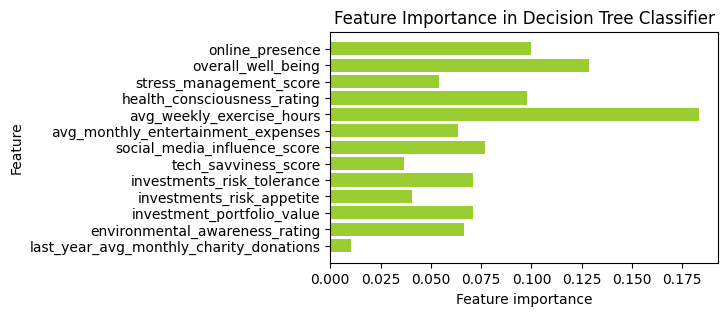

In [ ]:
plot_feature_importances(modelDT,X_train_scaled)

### Parameters of the Decision Tree Classifier

In [ ]:
modelDT_entropy = DecisionTreeClassifier(criterion='entropy')
modelDT_entropy.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
modelDT_entropy.score(X_train_scaled, y_train)

1.0

In [ ]:
modelDT_entropy.score(X_val_scaled, y_val)

0.6687182994244031

### Overfitting in Decision Tree

### Max Depth manipulation

In [ ]:
modelDT_maxdepth10 = DecisionTreeClassifier(max_depth=10)

In [ ]:
modelDT_maxdepth10.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
modelDT_maxdepth10.score(X_train_scaled, y_train)

0.7465376724039667

In [ ]:
modelDT_maxdepth10.score(X_val_scaled, y_val)

0.7038240155012253

### Min samples manipulation

In [ ]:
modelDT_minsamples = DecisionTreeClassifier(min_samples_split=120)

In [ ]:
modelDT_minsamples.fit(X_train_scaled,y_train)

DecisionTreeClassifier(min_samples_split=120)

In [ ]:
modelDT_minsamples.score(X_train_scaled, y_train)

0.7583494813632736

In [ ]:
modelDT_minsamples.score(X_val_scaled, y_val)

0.6924830455348493

### Min samples leaf manipulation

In [ ]:
modelDT_minsamplesleaf = DecisionTreeClassifier(min_samples_leaf=50)

In [ ]:
modelDT_minsamplesleaf.fit(X_train_scaled,y_train)

DecisionTreeClassifier(min_samples_leaf=50)

In [ ]:
modelDT_minsamplesleaf.score(X_train_scaled, y_train)

0.7440442266043543

In [ ]:
modelDT_minsamplesleaf.score(X_val_scaled, y_val)

0.7049638114777455

### Number of leafs manipulation

In [ ]:
modelDT_leafs500 = DecisionTreeClassifier(max_leaf_nodes=500)

In [ ]:
modelDT_leafs500.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_leaf_nodes=500)

In [ ]:
modelDT_leafs500.score(X_train_scaled, y_train)

0.7567394277898096

In [ ]:
modelDT_leafs500.score(X_val_scaled, y_val)

0.713911209893429

### Pruning

In [ ]:
scores_train = []
scores_test = []
for i in range(1,15):
    DTC = DecisionTreeClassifier(max_depth=i)
    DTC.fit(X_train_scaled, y_train)
    scores_train.append(DTC.score(X_train_scaled, y_train))
    scores_test.append(DTC.score(X_val_scaled, y_val))

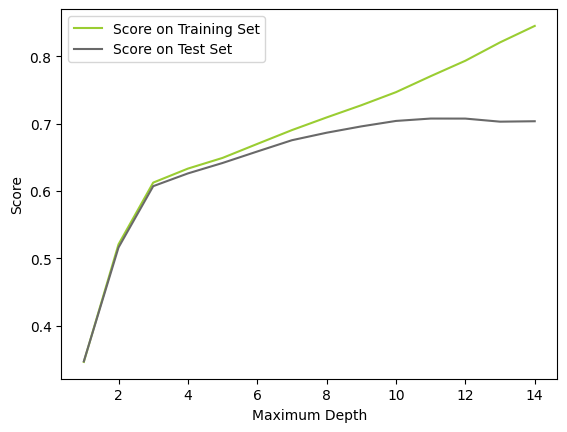

In [ ]:
plt.plot(list(range(1,15)), scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,15)), scores_test, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [ ]:
scores_train = []
scores_test = []
parameters = []
for i in range(120, 140):
    for j in range(3,11):
        parameters.append([i,j])
        DTR = DecisionTreeClassifier(min_samples_split=i, max_depth=j)
        DTR.fit(X_train_scaled, y_train)
        scores_train.append(DTR.score(X_train_scaled, y_train))
        scores_test.append(DTR.score(X_val_scaled, y_val))

In [ ]:
len(scores_train)

160

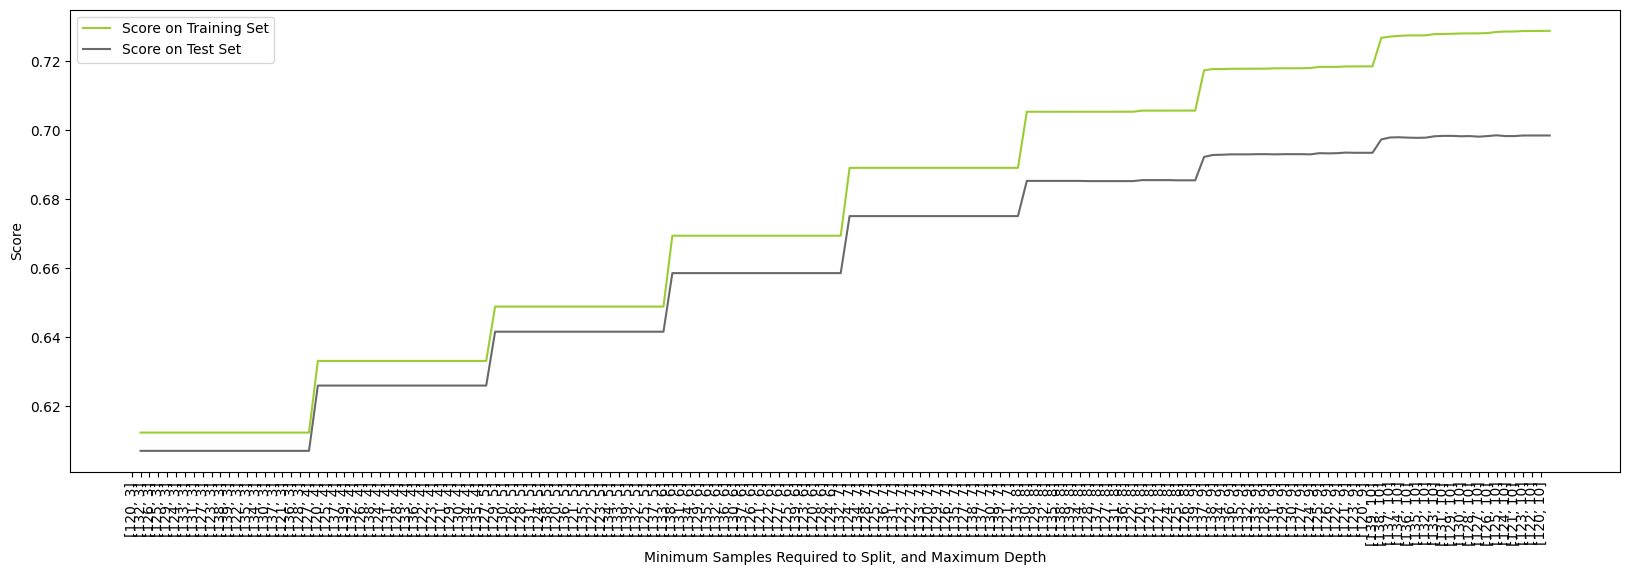

In [ ]:
scores = pd.DataFrame({'Score_Train': scores_train,'Score_Test': scores_test,'Parameters': parameters}).sort_values(by=['Score_Train'])
plt.figure(figsize=(20,6))
plt.plot(list(range(1,161)), scores['Score_Train'], label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,161)), scores['Score_Test'], label="Score on Test Set", color='dimgray')
plt.xlabel("Minimum Samples Required to Split, and Maximum Depth")
plt.ylabel("Score")
plt.xticks(np.arange(len(parameters)), scores['Parameters'])
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Multiclass with Decision Tree

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import random
from tqdm import tqdm

In [ ]:
def cross_validation(X, y, model, method):
  score_train = []
  score_val = []

  # Method: KFold
  for train_index, val_index in method.split(X,y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Fit train, predict on train and val
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    # Calculate weighted F1 score
    value_train = f1_score(train_pred, y_train, average = 'weighted')
    value_val = f1_score(val_pred, y_val, average = 'weighted')

    # Append it to score lists
    score_train.append(value_train)
    score_val.append(value_val)

  return np.mean(score_train), np.mean(score_val)

In [ ]:
#Initialize random seed to make results reproducible
random.seed(15)

# Set parameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 8, 10, 15],
    'min_samples_split': [100, 120, 140],
    'min_samples_leaf': [40, 50, 60],
    'class_weight': ['balanced']
}


# List to store results
result = []

# How many different sets of parameters we will try
num_iterations = 30

# Splits in cross-validation
kf = StratifiedKFold(n_splits=5)

for i in tqdm(range(num_iterations)):

    # Choose random parameters from parameters grid
    random_params = {}
    for key, values in param_grid.items():
        random_params[key] = random.choice(values)

    # Define model and set parameters
    model = DecisionTreeClassifier()
    model.set_params(**random_params)

    train_f1, val_f1 = cross_validation(X_train_multiclass, y_train_multiclass, model, kf)

    result.append([train_f1, val_f1, list(random_params.values())])


100%|██████████| 30/30 [06:01<00:00, 12.06s/it]


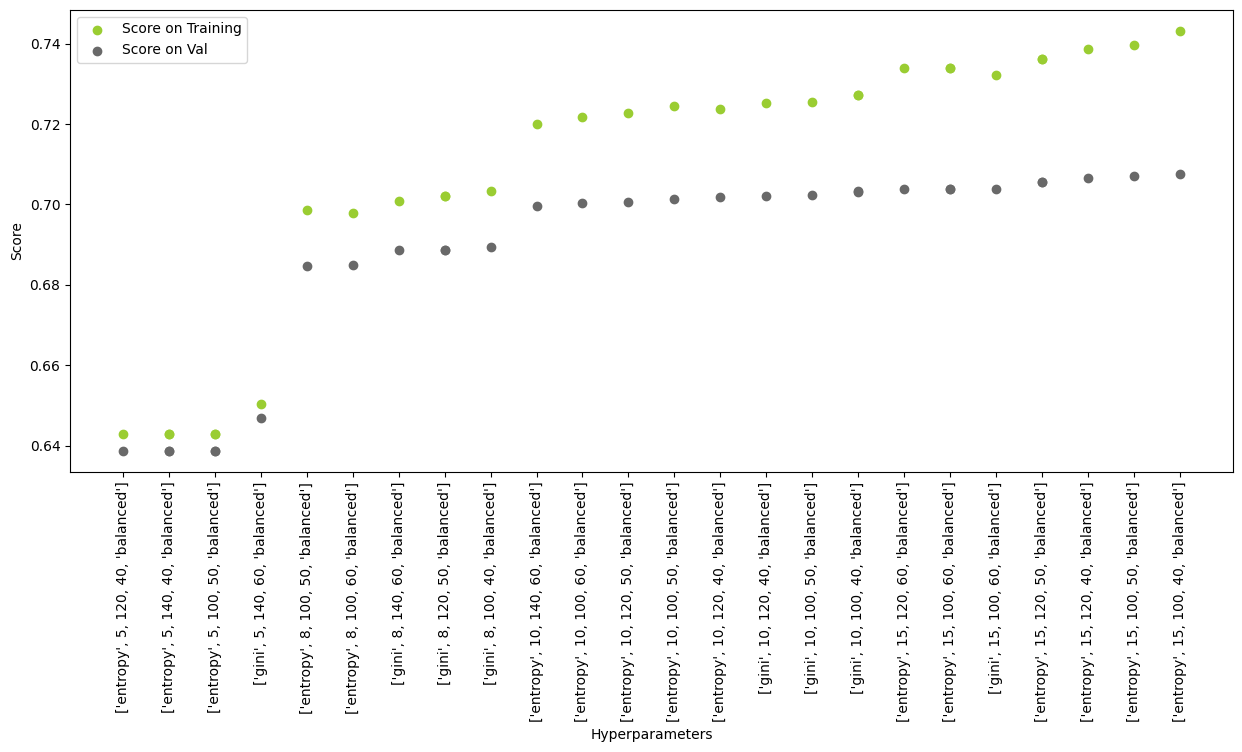

In [ ]:
scores = pd.DataFrame(result, columns = ['Score_Train', 'Score_Val', 'Parameters']).sort_values('Score_Val')
plt.figure(figsize=(15,6))
plt.scatter(scores['Parameters'].astype(str), scores['Score_Train'], label="Score on Training", color='yellowgreen')
plt.scatter(scores['Parameters'].astype(str), scores['Score_Val'], label="Score on Val", color='dimgray')
plt.xlabel("Hyperparameters")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# Model definition
modelDT = DecisionTreeClassifier(class_weight = 'balanced',
                               criterion = 'gini',
                               max_depth = 8,
                               min_samples_split=100,
                               min_samples_leaf=40)

# Fit and predict
modelDT.fit(X_train_multiclass, y_train_multiclass)
y_pred = modelDT.predict(X_test_multiclass)

# Calculate score
f1_score(y_test_multiclass, y_pred, average = 'weighted')

0.6914463375868265

## <font color='#BFD72F'> 5.5  Ensemble Models - Bagging </font>


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_DT = BaggingClassifier(base_estimator = modelDT)

In [ ]:
bagging_DT.fit(X = X_train_scaled, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=8,
                                                        min_samples_leaf=40,
                                                        min_samples_split=100))

In [ ]:
bagging_DT.score(X_train_scaled, y_train)

0.7141513735324291

In [ ]:
bagging_DT.score(X_val_scaled, y_val)

0.6960164130620619

In [ ]:
y_pred_bagging = bagging_DT.predict(X_val_scaled)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def metrics(y_model1, pred_model1, y_model2, pred_model2):
    print('___________________________________________________________________________________________________________')
    print('                                          Simple Model                                                     ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model1, pred_model1))


    print('___________________________________________________________________________________________________________')
    print('                                              Bagging                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model2, pred_model2))

In [ ]:
metrics(y_val, y_pred, y_val, y_pred_bagging)

___________________________________________________________________________________________________________
                                          Simple Model                                                     
-----------------------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

  Adventure Seeker       0.21      0.21      0.21      3516
Fitness Enthusiast       0.21      0.21      0.21      3521
  Health-Conscious       0.20      0.20      0.20      3540
          Investor       0.20      0.20      0.20      3493
 Travel Enthusiast       0.20      0.20      0.20      3477

          accuracy                           0.20     17547
         macro avg       0.20      0.20      0.20     17547
      weighted avg       0.20      0.20      0.20     17547

___________________________________________________________________________________________________________
                         

In [ ]:
bagging_DT.estimators_

[DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                        min_samples_leaf=40, min_samples_split=100,
                        random_state=1806854417),
 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                        min_samples_leaf=40, min_samples_split=100,
                        random_state=123551760),
 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                        min_samples_leaf=40, min_samples_split=100,
                        random_state=1247789363),
 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                        min_samples_leaf=40, min_samples_split=100,
                        random_state=1570707080),
 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                        min_samples_leaf=40, min_samples_split=100,
                        random_state=1276737051),
 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                        min_samples_lea

In [ ]:
bagging_DT.estimators_samples_

[array([26897, 33332, 45001, ...,  2280, 43280, 52320]),
 array([69776, 32963, 36440, ..., 68480, 58588, 36002]),
 array([39842, 23550, 55601, ..., 39984, 27682, 28635]),
 array([22811, 43610, 36813, ..., 58980, 16029, 57642]),
 array([39412,   982, 64159, ..., 47401,  4187,  4274]),
 array([13174, 14620, 63434, ..., 18455, 18032,  6820]),
 array([52195, 42626, 27242, ..., 45411, 40490, 12533]),
 array([43400, 64668, 31677, ..., 18706,  8690, 56398]),
 array([32552, 31341, 28853, ..., 38182, 18789, 65419]),
 array([ 7963, 68518,  6247, ..., 40766, 18566, 38599])]

In [ ]:
bagging_DT_40 = BaggingClassifier(base_estimator = modelDT, n_estimators = 40, random_state = 5)

In [ ]:
bagging_DT_40.fit(X = X_train_scaled, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=8,
                                                        min_samples_leaf=40,
                                                        min_samples_split=100),
                  n_estimators=40, random_state=5)

In [ ]:
bagging_DT_s = BaggingClassifier(base_estimator = modelDT, max_samples = 0.5, random_state = 5)

In [ ]:
bagging_DT_s.fit(X = X_train_scaled, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=8,
                                                        min_samples_leaf=40,
                                                        min_samples_split=100),
                  max_samples=0.5, random_state=5)

In [ ]:
bagging_DT_b = BaggingClassifier(base_estimator = modelDT, bootstrap = False, random_state = 5)

In [ ]:
bagging_DT_b.fit(X = X_train_scaled, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=8,
                                                        min_samples_leaf=40,
                                                        min_samples_split=100),
                  bootstrap=False, random_state=5)

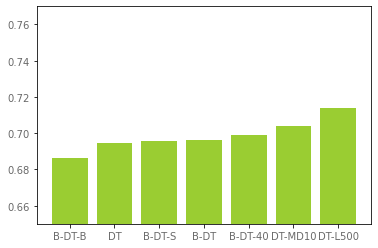

In [ ]:
accuracies = [modelDT.score(X_val_scaled, y_val), bagging_DT.score(X_val_scaled, y_val), bagging_DT_40.score(X_val_scaled, y_val),
              bagging_DT_s.score(X_val_scaled, y_val), bagging_DT_b.score(X_val_scaled, y_val), modelDT_leafs500.score(X_val_scaled, y_val),
              modelDT_maxdepth10.score(X_val_scaled, y_val)]
models = ['DT', 'B-DT', 'B-DT-40', 'B-DT-S', 'B-DT-B', 'DT-L500', 'DT-MD10']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1], color='yellowgreen')
plt.xticks(color='dimgray')
plt.yticks(color='dimgray')
plt.ylim(0.65,0.77)
plt.show()

## <font color='#BFD72F'> 5.6  Ensemble Models - Bagging - Random Forest </font>


In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier()

In [ ]:
modelRF.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
modelRF.score(X_val_scaled, y_val)

0.7658289166239243

In [ ]:
len(modelRF.estimators_)

100

In [ ]:
modelRF_6trees = RandomForestClassifier(n_estimators=6)

In [ ]:
modelRF_6trees.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=6)

In [ ]:
modelRF_maxdepth10 = RandomForestClassifier(max_depth=10)

In [ ]:
modelRF_maxdepth10.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
accuracies_test = [modelDT.score(X_val_scaled, y_val),
                   bagging_DT.score(X_val_scaled, y_val),
                   bagging_DT_40.score(X_val_scaled, y_val),
                   bagging_DT_s.score(X_val_scaled, y_val),
                   bagging_DT_b.score(X_val_scaled, y_val),
                   modelRF.score(X_val_scaled, y_val),
                   modelRF_6trees.score(X_val_scaled, y_val),
                   modelRF_maxdepth10.score(X_val_scaled, y_val)]
accuracies_train = [modelDT.score(X_train_scaled, y_train),
                    bagging_DT.score(X_train_scaled, y_train),
                    bagging_DT_40.score(X_train_scaled, y_train),
                    bagging_DT_s.score(X_train_scaled, y_train),
                    bagging_DT_b.score(X_train_scaled, y_train),
                    modelRF.score(X_train_scaled, y_train),
                    modelRF_6trees.score(X_train_scaled, y_train),
                    modelRF_maxdepth10.score(X_train_scaled, y_train)]
models = ['DT', 'B', 'B-E', 'B-S', 'B-B', 'RF', 'RF-E', 'RF-D']
data_tuples = list(zip(models,accuracies_test))
data_test = pd.DataFrame(data_tuples)
data_tuples_train = list(zip(models,accuracies_train))
data_train = pd.DataFrame(data_tuples_train)

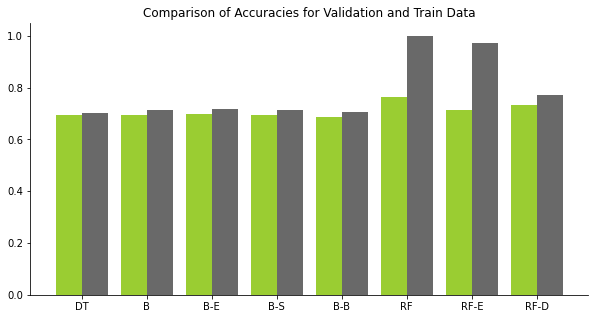

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.bar(data_test.index - 0.4/2, data_test[1], width=0.4, color='yellowgreen', label='Validation Accuracy')
ax.bar(data_train.index + 0.4/2, data_train[1],  width=0.4, color='dimgray', label='Train Accuracy')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Comparison of Accuracies for Validation and Train Data', fontsize=12)
plt.xticks(np.arange(len(models)), models)
plt.show()

## <font color='#BFD72F'> 5.7  Ensemble Models - Boosting </font>


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
aboost = AdaBoostClassifier()

In [ ]:
aboost.fit(X_train_scaled, y_train)

AdaBoostClassifier()

In [ ]:
aboost.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=780890676),
 DecisionTreeClassifier(max_depth=1, random_state=370383274),
 DecisionTreeClassifier(max_depth=1, random_state=1537587695),
 DecisionTreeClassifier(max_depth=1, random_state=670412956),
 DecisionTreeClassifier(max_depth=1, random_state=430876634),
 DecisionTreeClassifier(max_depth=1, random_state=1527337207),
 DecisionTreeClassifier(max_depth=1, random_state=1440095908),
 DecisionTreeClassifier(max_depth=1, random_state=45809523),
 DecisionTreeClassifier(max_depth=1, random_state=1385070875),
 DecisionTreeClassifier(max_depth=1, random_state=334671943),
 DecisionTreeClassifier(max_depth=1, random_state=1889584051),
 DecisionTreeClassifier(max_depth=1, random_state=2094435432),
 DecisionTreeClassifier(max_depth=1, random_state=447259643),
 DecisionTreeClassifier(max_depth=1, random_state=912784544),
 DecisionTreeClassifier(max_depth=1, random_state=1038169094),
 DecisionTreeClassifier(max_depth=1, random_state=309280741),
 D

In [ ]:
aboost.score(X_val_scaled, y_val)

0.6729355445375278

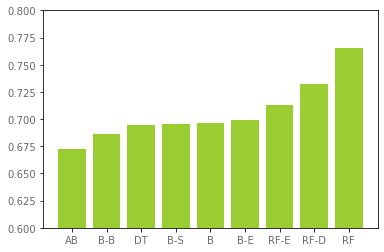

In [ ]:
accuracies = [modelDT.score(X_val_scaled, y_val), bagging_DT.score(X_val_scaled, y_val), bagging_DT_40.score(X_val_scaled, y_val),
              bagging_DT_s.score(X_val_scaled, y_val), bagging_DT_b.score(X_val_scaled, y_val), modelRF.score(X_val_scaled, y_val),
              modelRF_6trees.score(X_val_scaled, y_val), modelRF_maxdepth10.score(X_val_scaled, y_val), aboost.score(X_val_scaled, y_val)]
models = ['DT', 'B', 'B-E', 'B-S', 'B-B', 'RF', 'RF-E', 'RF-D', 'AB']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1], color='yellowgreen')
plt.xticks(color='dimgray')
plt.yticks(color='dimgray')
plt.ylim(0.6,0.8)
plt.show()

## <font color='#BFD72F'> 5.8  Ensemble Models - Stacking </font>


In [ ]:
from sklearn.ensemble import StackingClassifier
base_learners = [('adb',aboost), ('rdf',modelRF)]
stacked = StackingClassifier(estimators=base_learners)

In [ ]:
stacked.fit(X_train_scaled, y_train).score(X_val_scaled, y_val)

0.7660568758192283

In [ ]:
from sklearn.tree import DecisionTreeClassifier
stacked_meta = StackingClassifier(estimators=base_learners, final_estimator=DecisionTreeClassifier())

In [ ]:
stacked_meta.fit(X_train_scaled, y_train).score(X_val_scaled, y_val)

0.6766968712600444

### Testing the best model

In [ ]:
# Initialize the Stacked Classifier
base_learners = [('adb',aboost), ('rdf',modelRF_maxdepth10), ('B-E',bagging_DT_40)]
modelSC = StackingClassifier(estimators=base_learners)

# Fit the model on the training data
modelSC.fit(X_train_scaled, y_train)

# Predict on the validation data
labels_train = modelSC.predict(X_train_scaled)
y_pred = modelSC.predict(X_val_scaled)

# Calculate the F1 Score
print("F1 Score between the y_train and labels_train:" + str(f1_score(y_train, labels_train, average='weighted')))
print("F1 Score between y_val and y_pred: " + str(f1_score(y_val, y_pred, average='weighted')))

F1 Score between the y_train and labels_train:0.7754109934496631
F1 Score between y_val and y_pred: 0.7382356867162311


# <font color='#BFD72F'> 6.  Cross-Validation </font>


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=5)
# Define model and set parameters
base_learners = [
    ('adb', aboost),
    ("rdf", modelRF_maxdepth10),
    ('B-E', bagging_DT_40)
]
model = StackingClassifier(estimators=base_learners)

train_f1, val_f1 = cross_validation(X_train_multiclass, y_train_multiclass, model, kf)


print(f'Cross-Validation Train Scores: {train_f1}')
print(f'Cross-Validation Validation Scores: {val_f1}')


Cross-Validation Train Scores: 0.7793811835736242
Cross-Validation Validation Scores: 0.741473398757578


# <font color='#BFD72F'> 7.  Performance Metrics </font>


Since we are before a classification problem (the target variable is categorical), the metrics we are using to assess the model's performance are: Confusion Matrix, Accuracy, Precision and Recall.

## <font color='#BFD72F'> 7.1  Confusion Matrix </font>


The Confusion Matrix below has five rows, each representing a possible value of out target value (Adventure Seeker, Fitness Enthusiast, Health-Conscious, Investor and Travel Enthusiast). For the first row, the first value represents
the number of samples correctly predicted as class 1, the second value represents the number of samples predicted as class 2 that belong to class 1. The same logic applies to the remaining values and rows.

The diagonal elements (2489, 2391, 2285, 2726, 3026) represent the correct predictions -  the number of points for which the predicted label is equal to the true label.



In [ ]:
confusion_matrix(y_val, y_pred)

array([[2489,  641,  171,  106,  109],
       [ 777, 2391,  201,   27,  125],
       [ 108,  159, 2285,  940,   48],
       [ 116,   62,  555, 2726,   34],
       [ 172,  194,   38,   47, 3026]])

## <font color='#BFD72F'> 7.2  Accuracy </font>


Accuracy Score - the proportion of predictions that the model got right

In [ ]:
accuracy_score(y_val, y_pred)

0.7361372314355731

## <font color='#BFD72F'> 7.3  Precision </font>


Precision Score - the proportion of positive identifications that were actually correct

In [ ]:
precision_score(y_val, y_pred,average = 'weighted')

0.7377341601474812

## <font color='#BFD72F'> 7.4  Recall Score </font>


Recall Score - the proportion of actual positives that were identified correctly

In [ ]:
recall_score(y_val, y_pred, average = 'weighted')

0.7361372314355731

# <font color='#BFD72F'> 8.  Grid Search </font>


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelDT_grid = DecisionTreeClassifier()
parameters = {'max_depth':list(range(2,11)),
              'min_samples_split':list(range(45,56))}

In [ ]:
grid = GridSearchCV(modelDT_grid, parameters)
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [45, 46, 47, 48, 49, 50, 51, 52,
                                               53, 54, 55]})

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.30800982, 0.29974103, 0.29964085, 0.29748321, 0.30162191,
        0.45458388, 0.45744824, 0.29632969, 0.30045419, 0.29651318,
        0.29971461, 0.39983144, 0.44797239, 0.59703689, 0.45359931,
        0.40365338, 0.40162625, 0.39955554, 0.41571655, 0.5962348 ,
        0.48168392, 0.39467063, 0.49373565, 0.49975939, 0.59279928,
        0.68765583, 0.49132247, 0.49613194, 0.49283495, 0.57420421,
        0.71180539, 0.49353704, 0.49005966, 0.58667507, 0.71536741,
        0.75497575, 0.59000812, 0.58688097, 0.62339101, 0.84916964,
        0.58536038, 0.81502872, 0.76322265, 0.79463687, 0.689502  ,
        0.69105115, 0.82039237, 0.83881927, 0.68496566, 0.68233991,
        0.89610243, 0.77386789, 0.68524261, 0.68767567, 0.99311485,
        0.77664552, 0.77971196, 0.94795146, 0.89131231, 0.78459597,
        0.83170443, 1.01905165, 0.77879992, 0.78689728, 1.09954605,
        0.77070365, 0.86841431, 1.10975857, 0.89128094, 0.8642312 ,
        1.1114274 , 0.89363947,

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=45)

In [ ]:
grid.score(X_val_scaled, y_val)

0.7030261583176611

# <font color='#BFD72F'>9. Data Preprocessing- Test dataset</font>

## <font color='#BFD72F'> 9.1 Descriptive Statistics - Test </font>

In [ ]:
test.shape

(38643, 20)

In [ ]:
train.columns

Index(['name', 'gender', 'date_of_birth',
       'last_year_avg_monthly_charity_donations',
       'environmental_awareness_rating', 'investment_portfolio_value',
       'investments_risk_appetite', 'investments_risk_tolerance',
       'tech_savviness_score', 'social_media_influence_score',
       'avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours',
       'health_consciousness_rating', 'stress_management_score',
       'overall_well_being', 'lifestyle_type', 'age', 'tech_savviness_bin',
       'social_media_influence_bin', 'online_presence',
       'financial_wellness_bin', 'investment_portfolio_bin',
       'risk_appetite_bin', 'risk_tolerance_bin', 'financial_stability',
       'risk_profile_category'],
      dtype='object')

In [ ]:
test.describe()

,citizen_id,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being
count,38643.000000,37290.000000,37677.000000,37677.000000,37484.000000,38063.000000,38063.000000,37677.000000,37290.000000,37290.000000,38063.000000,37097.000000,37677.000000,37097.000000,38063.000000
mean,109487.000000,0.196782,1.014444,105.214634,19.215478,4.463641,7.168307,13.452971,6.387463,1.846203,25.205771,0.865468,1.247558,3.223165,113.109573
std,11155.417563,0.553792,0.912462,50.562016,35.652463,2.702025,3.933878,1.491189,4.275154,0.348413,19.408631,1.249984,1.215880,1.136746,50.656356
min,90166.000000,-3.000000,0.006600,0.050000,0.500000,0.000000,0.000000,6.996600,0.000000,0.320000,0.000000,-3.898100,0.000000,0.000000,5.314500
25%,99826.500000,0.000000,0.564700,94.310100,5.750450,1.902750,4.655850,12.498500,3.327825,1.648900,8.715250,0.024000,0.655700,2.473000,101.900000
50%,109487.000000,0.000000,0.662200,99.864500,10.607100,4.948400,6.067800,13.472900,4.780050,1.869950,17.706200,0.164800,0.768800,3.079200,107.915000
75%,119147.500000,0.000000,0.980500,106.303000,15.495650,6.946150,8.430500,14.427800,8.832500,2.071700,40.742550,1.390500,1.250100,3.859600,115.199500
max,128808.000000,5.000000,10.340700,537.974000,435.471000,11.318300,43.909000,31.309600,44.336800,3.341550,153.673000,8.337700,11.055300,8.887600,545.815000


In [ ]:
test.duplicated().sum()

0

In [ ]:
test.head()

,citizen_id,name,title,date_of_birth,city,country,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being
0,90166,Deniz,Mrs.,1987-03-23,Mining City,Data Land,NaN,0.6724,100.502,10.1762,1.7516,8.4129,15.1645,9.3925,2.2621,64.2378,0.0626,0.7672,4.9523,108.851
1,90167,Saana,Mrs.,1966-10-19,Mining City,Data Land,0.0,0.5993,102.870,7.1811,0.0034,6.6384,15.3898,6.6101,1.8308,18.7592,0.5960,1.4061,2.5396,111.971
2,90168,مرسانا,Miss,1989-03-05,Mining City,Data Land,0.0,0.6675,102.963,16.9708,2.3346,4.2747,12.7121,11.9248,1.7735,11.2036,1.3633,2.5570,2.6267,111.876
3,90169,Ratimir,Mr.,1974-11-11,Mining City,Data Land,0.0,2.3741,101.108,11.3375,7.2085,14.3043,11.5065,3.6422,2.1187,48.5756,2.6768,0.8079,3.2889,107.669
4,90170,Jamie,Mr.,1995-09-22,Mining City,Data Land,0.0,0.6015,100.780,4.8217,4.2585,6.3106,15.8794,7.8561,1.4942,31.5998,0.0000,1.0359,2.1572,109.756


In [ ]:
test.describe(include = ['O'])

,name,title,date_of_birth,city,country
count,38643,38643,38643,38643,38643
unique,7424,4,14108,1,1
top,Olivia,Mr.,1997-05-10,Mining City,Data Land
freq,104,19429,13,38643,38643


## <font color='#BFD72F'> 9.2 Handling Incoherences - Test</font>







In [ ]:
# Every citizen ID is unique
is_unique = test['citizen_id'].is_unique
is_unique

True

In [ ]:
# Keep Mr. and Ms. only
test['title'].value_counts()

title
Mr.     19429
Ms.      6546
Miss     6421
Mrs.     6247
Name: count, dtype: int64

In [ ]:
test['title'] = test['title'].replace({
    'Miss': 'Female',
    'Mrs.': 'Female',
    'Ms.' : 'Female',
    'Mr.' : 'Male',
})

In [ ]:
test.rename(columns={'title': 'gender'}, inplace=True)

In [ ]:
test['gender'] = test['gender'].replace({
    'Male': 0,
    'Female' : 1,

  })

In [ ]:
test['gender'].value_counts()

gender
0    19429
1    19214
Name: count, dtype: int64

In [ ]:
test['environmental_awareness_rating'].max()

10.3407

In [ ]:
test['environmental_awareness_rating'].min()

0.0066

<Axes: xlabel='environmental_awareness_rating', ylabel='Count'>

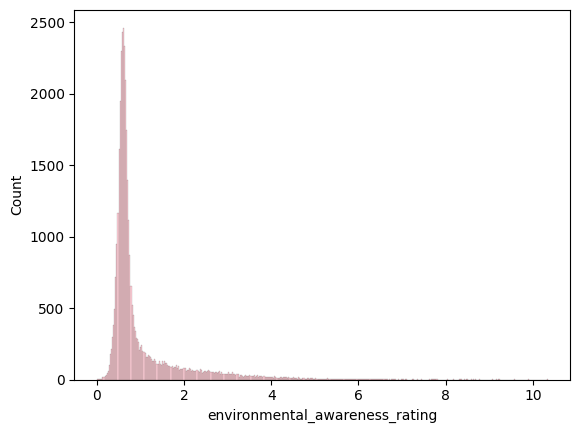

In [ ]:
sns.histplot(test['environmental_awareness_rating'], color='pink')

In [ ]:
test['health_consciousness_rating'].max()

11.0553

In [ ]:
test['health_consciousness_rating'].min()

0.0

<Axes: xlabel='health_consciousness_rating', ylabel='Count'>

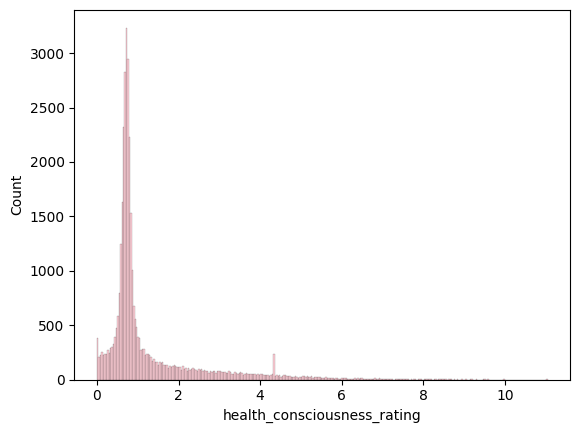

In [ ]:
sns.histplot(test['health_consciousness_rating'], color='pink')

In [ ]:
test.shape

(38643, 20)

## <font color='#BFD72F'> 9.3 Create Variable Age - Test</font>


In [ ]:
#convert date_of_birth to datetime format
test['date_of_birth'] = pd.to_datetime(test['date_of_birth'])

In [ ]:
#calculate current date
current_date = datetime.now()

In [ ]:
#calculate age
test['age'] = (current_date - test['date_of_birth']).dt.days // 365

In [ ]:
test.head()

,citizen_id,name,gender,date_of_birth,city,country,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,...,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,age
0,90166,Deniz,1,1987-03-23,Mining City,Data Land,NaN,0.6724,100.502,10.1762,...,8.4129,15.1645,9.3925,2.2621,64.2378,0.0626,0.7672,4.9523,108.851,37
1,90167,Saana,1,1966-10-19,Mining City,Data Land,0.0,0.5993,102.870,7.1811,...,6.6384,15.3898,6.6101,1.8308,18.7592,0.5960,1.4061,2.5396,111.971,57
2,90168,مرسانا,1,1989-03-05,Mining City,Data Land,0.0,0.6675,102.963,16.9708,...,4.2747,12.7121,11.9248,1.7735,11.2036,1.3633,2.5570,2.6267,111.876,35
3,90169,Ratimir,0,1974-11-11,Mining City,Data Land,0.0,2.3741,101.108,11.3375,...,14.3043,11.5065,3.6422,2.1187,48.5756,2.6768,0.8079,3.2889,107.669,49
4,90170,Jamie,0,1995-09-22,Mining City,Data Land,0.0,0.6015,100.780,4.8217,...,6.3106,15.8794,7.8561,1.4942,31.5998,0.0000,1.0359,2.1572,109.756,28


In [ ]:
test['age'].max()

100

In [ ]:
test['age'].min()

18

Text(0.5, 1.0, 'Histogram of Age')

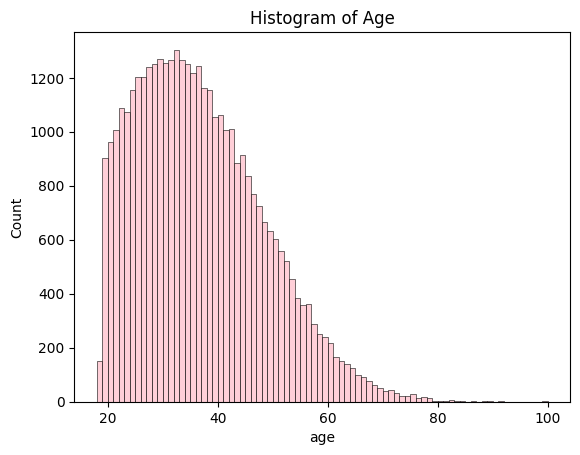

In [ ]:
sns.histplot(test['age'], color='pink')
plt.title('Histogram of Age')

## <font color='#BFD72F'> 9.4 Data Visialization - Test</font>


<Axes: xlabel='last_year_avg_monthly_charity_donations', ylabel='Count'>

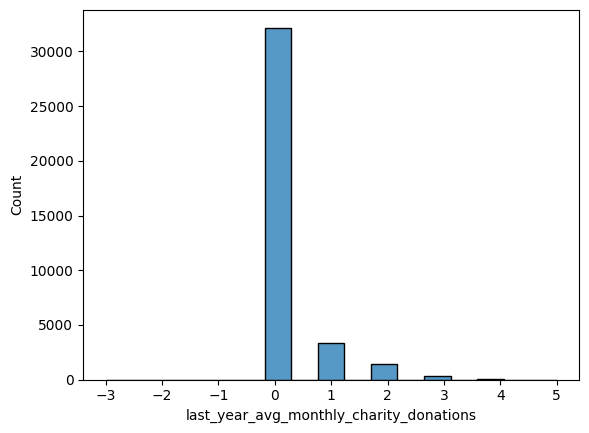

In [ ]:
sns.histplot(test['last_year_avg_monthly_charity_donations'])

In [ ]:
test["last_year_avg_monthly_charity_donations"] = test["last_year_avg_monthly_charity_donations"].abs()

<Axes: xlabel='last_year_avg_monthly_charity_donations', ylabel='Count'>

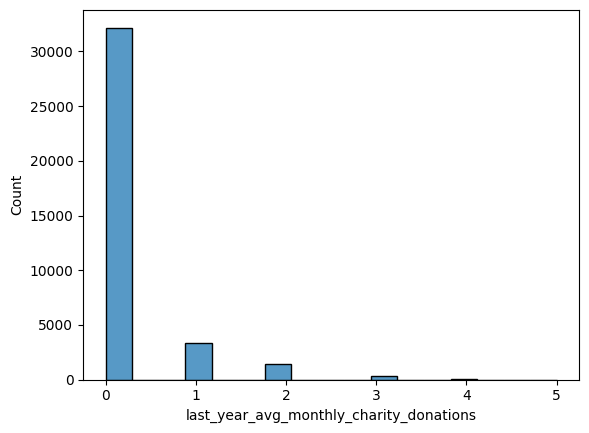

In [ ]:
sns.histplot(test['last_year_avg_monthly_charity_donations'])

<Axes: xlabel='environmental_awareness_rating', ylabel='Count'>

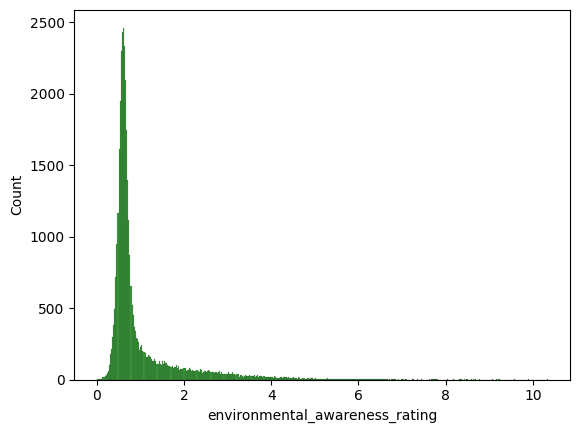

In [ ]:
sns.histplot(test['environmental_awareness_rating'], color='green')

<Axes: xlabel='financial_wellness_index', ylabel='Count'>

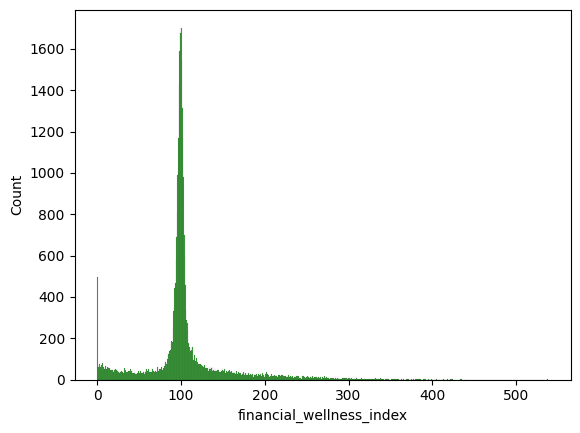

In [ ]:
sns.histplot(test['financial_wellness_index'], color='green')

<Axes: xlabel='investment_portfolio_value', ylabel='Count'>

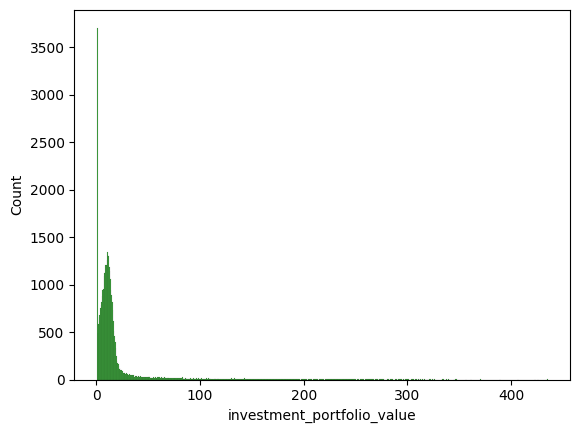

In [ ]:
sns.histplot(test['investment_portfolio_value'], color='green')

<Axes: ylabel='investment_portfolio_value'>

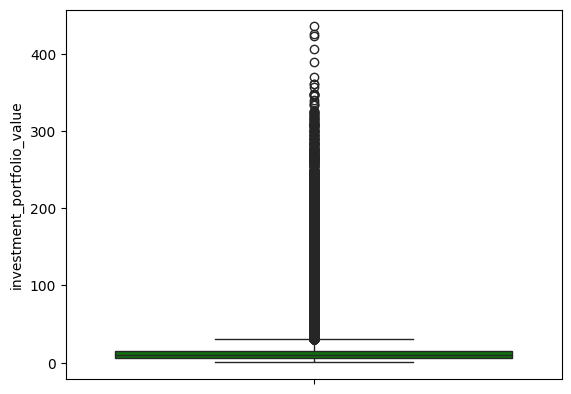

In [ ]:
sns.boxplot(test['investment_portfolio_value'], color='green')

<Axes: ylabel='investments_risk_appetite'>

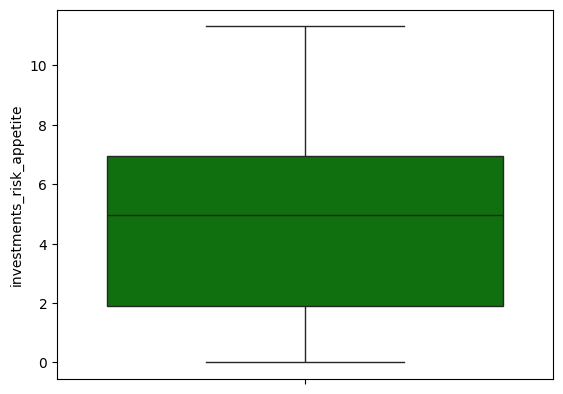

In [ ]:
sns.boxplot(test['investments_risk_appetite'], color='green')

<Axes: xlabel='investments_risk_appetite', ylabel='Count'>

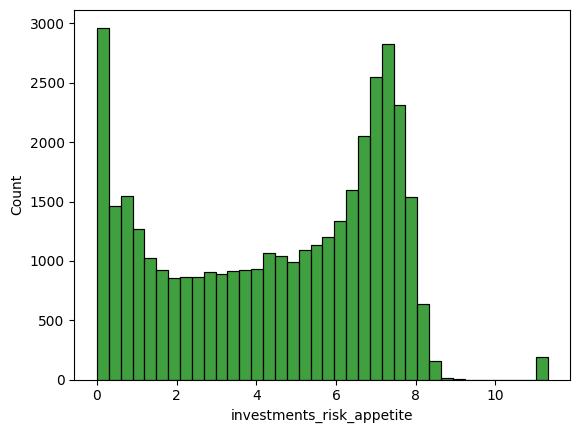

In [ ]:
sns.histplot(test['investments_risk_appetite'], color='green')

<Axes: ylabel='investments_risk_tolerance'>

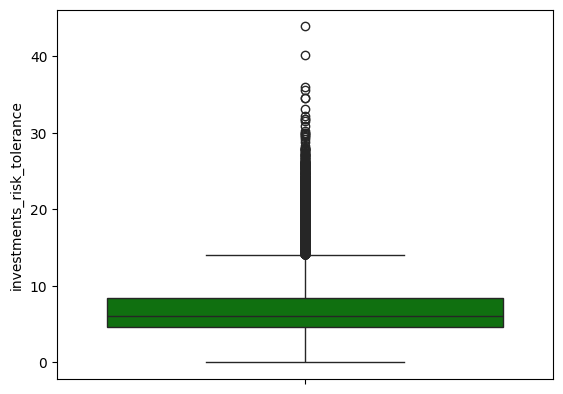

In [ ]:
sns.boxplot(test['investments_risk_tolerance'], color='green')

<Axes: xlabel='investments_risk_tolerance', ylabel='Count'>

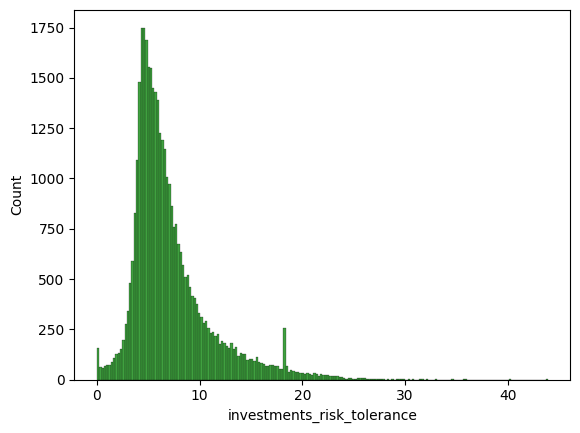

In [ ]:
sns.histplot(test['investments_risk_tolerance'], color='green')

<Axes: ylabel='tech_savviness_score'>

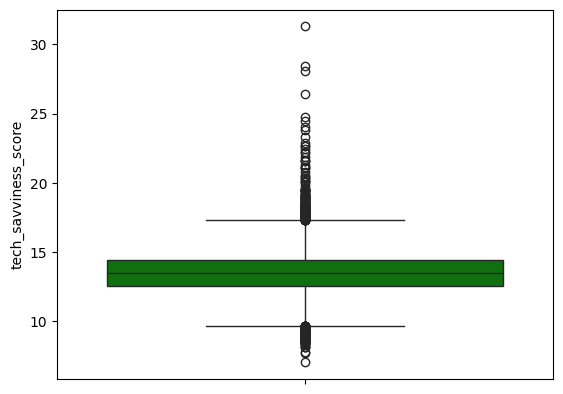

In [ ]:
sns.boxplot(test['tech_savviness_score'], color='green')

<Axes: xlabel='tech_savviness_score', ylabel='Count'>

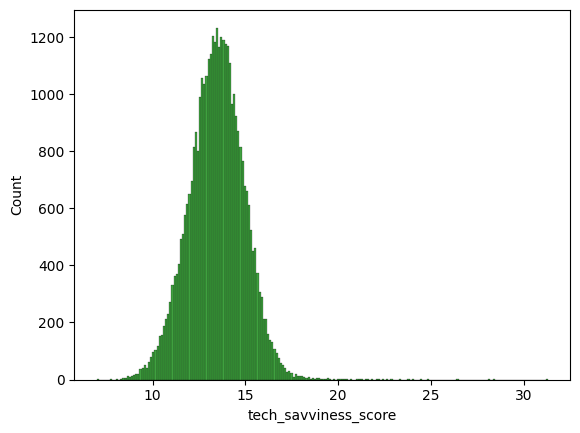

In [ ]:
sns.histplot(test['tech_savviness_score'], color='green')

<Axes: ylabel='social_media_influence_score'>

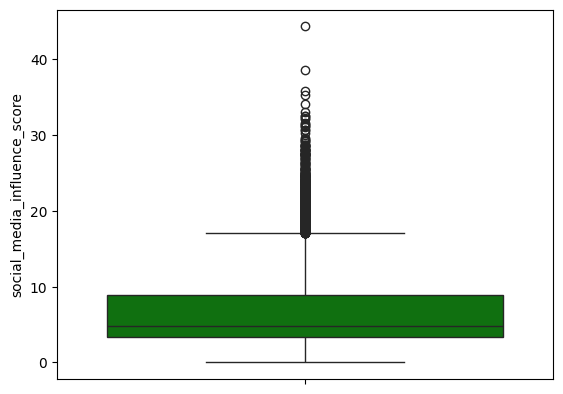

In [ ]:
sns.boxplot(test['social_media_influence_score'], color='green')

<Axes: xlabel='social_media_influence_score', ylabel='Count'>

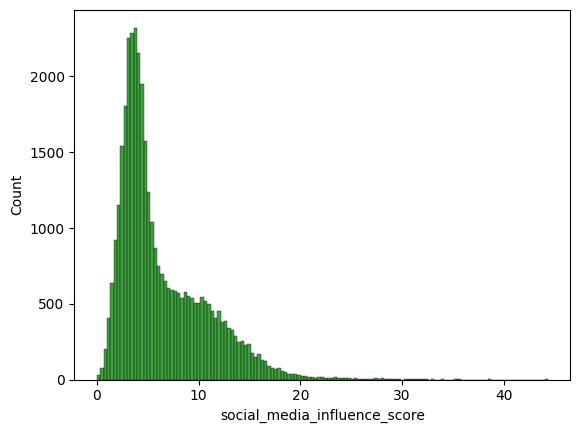

In [ ]:
sns.histplot(test['social_media_influence_score'], color='green')

<Axes: xlabel='entertainment_engagement_factor', ylabel='Count'>

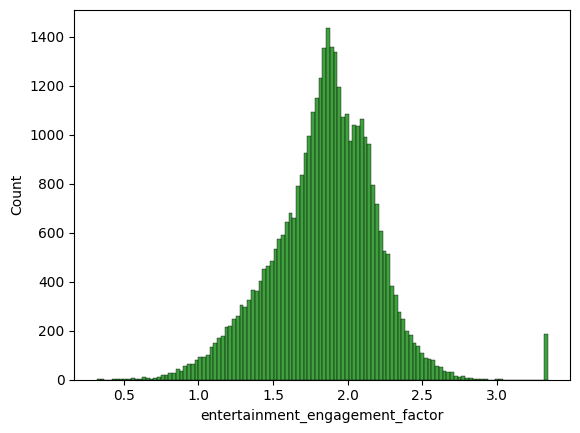

In [ ]:
sns.histplot(test['entertainment_engagement_factor'], color='green')

<Axes: ylabel='entertainment_engagement_factor'>

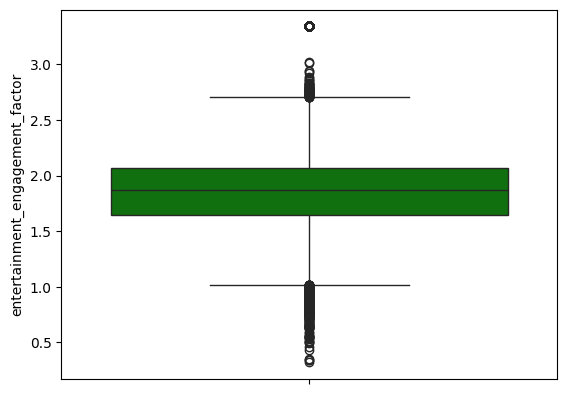

In [ ]:
sns.boxplot(test['entertainment_engagement_factor'], color='green')

<Axes: ylabel='avg_monthly_entertainment_expenses'>

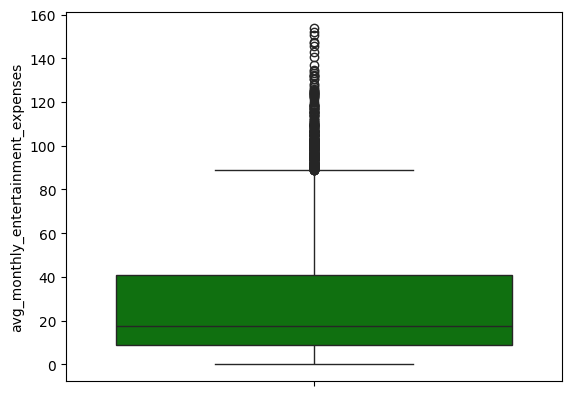

In [ ]:
sns.boxplot(test['avg_monthly_entertainment_expenses'], color='green')

<Axes: xlabel='avg_monthly_entertainment_expenses', ylabel='Count'>

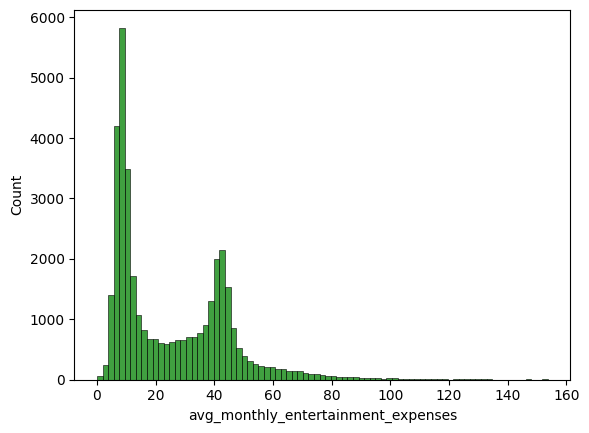

In [ ]:
sns.histplot(test['avg_monthly_entertainment_expenses'], color='green')

In [ ]:
test.describe()

,citizen_id,gender,date_of_birth,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,age
count,38643.000000,38643.000000,38643,37290.000000,37677.000000,37677.000000,37484.000000,38063.000000,38063.000000,37677.000000,37290.000000,37290.000000,38063.000000,37097.000000,37677.000000,37097.000000,38063.000000,38643.000000
mean,109487.000000,0.497218,1987-08-07 11:43:37.343373952,0.197318,1.014444,105.214634,19.215478,4.463641,7.168307,13.452971,6.387463,1.846203,25.205771,0.865468,1.247558,3.223165,113.109573,36.369330
min,90166.000000,0.000000,1923-11-05 00:00:00,0.000000,0.006600,0.050000,0.500000,0.000000,0.000000,6.996600,0.000000,0.320000,0.000000,-3.898100,0.000000,0.000000,5.314500,18.000000
25%,99826.500000,0.000000,1980-02-09 00:00:00,0.000000,0.564700,94.310100,5.750450,1.902750,4.655850,12.498500,3.327825,1.648900,8.715250,0.024000,0.655700,2.473000,101.900000,27.000000
50%,109487.000000,0.000000,1989-02-05 00:00:00,0.000000,0.662200,99.864500,10.607100,4.948400,6.067800,13.472900,4.780050,1.869950,17.706200,0.164800,0.768800,3.079200,107.915000,35.000000
75%,119147.500000,1.000000,1996-09-30 00:00:00,0.000000,0.980500,106.303000,15.495650,6.946150,8.430500,14.427800,8.832500,2.071700,40.742550,1.390500,1.250100,3.859600,115.199500,44.000000
max,128808.000000,1.000000,2005-08-20 00:00:00,5.000000,10.340700,537.974000,435.471000,11.318300,43.909000,31.309600,44.336800,3.341550,153.673000,8.337700,11.055300,8.887600,545.815000,100.000000
std,11155.417563,0.499999,NaN,0.553601,0.912462,50.562016,35.652463,2.702025,3.933878,1.491189,4.275154,0.348413,19.408631,1.249984,1.215880,1.136746,50.656356,11.539433


<Axes: xlabel='avg_weekly_exercise_hours', ylabel='Count'>

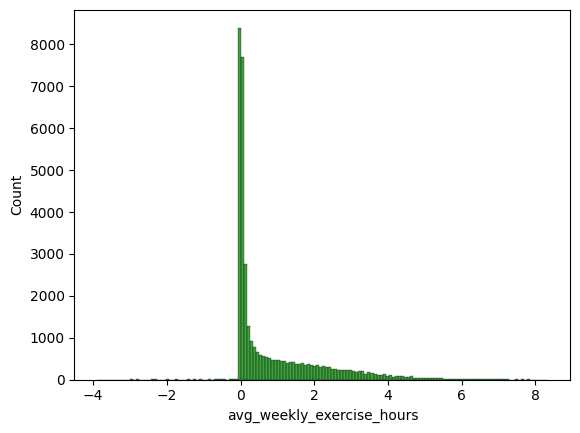

In [ ]:
sns.histplot(test['avg_weekly_exercise_hours'], color='green')

In [ ]:
test["avg_weekly_exercise_hours"] = test["avg_weekly_exercise_hours"].abs()

<Axes: xlabel='avg_weekly_exercise_hours', ylabel='Count'>

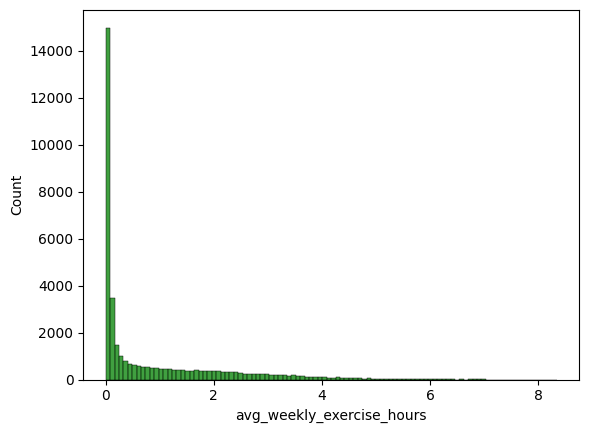

In [ ]:
sns.histplot(test['avg_weekly_exercise_hours'], color='green')

<Axes: xlabel='health_consciousness_rating', ylabel='Count'>

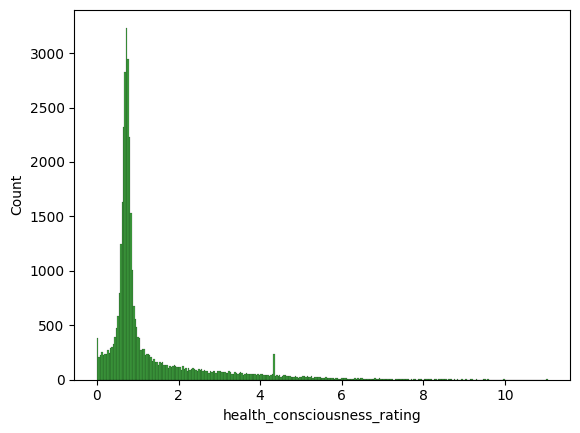

In [ ]:
sns.histplot(test['health_consciousness_rating'], color='green')

<Axes: ylabel='stress_management_score'>

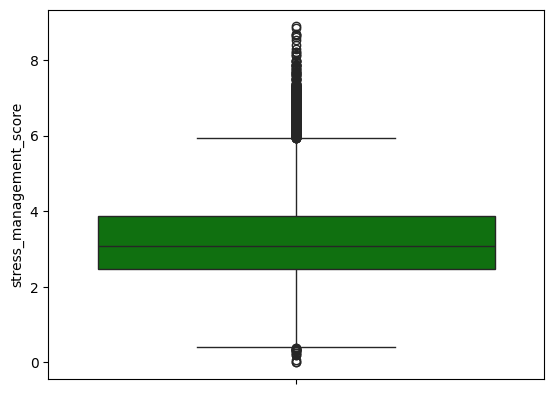

In [ ]:
sns.boxplot(test['stress_management_score'], color='green')

<Axes: xlabel='stress_management_score', ylabel='Count'>

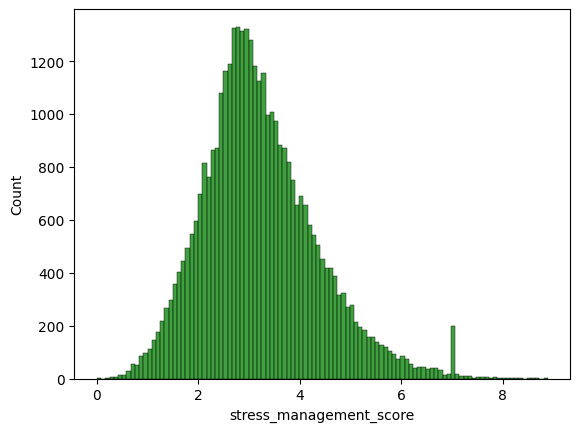

In [ ]:
sns.histplot(test['stress_management_score'], color='green')

<Axes: xlabel='overall_well_being', ylabel='Count'>

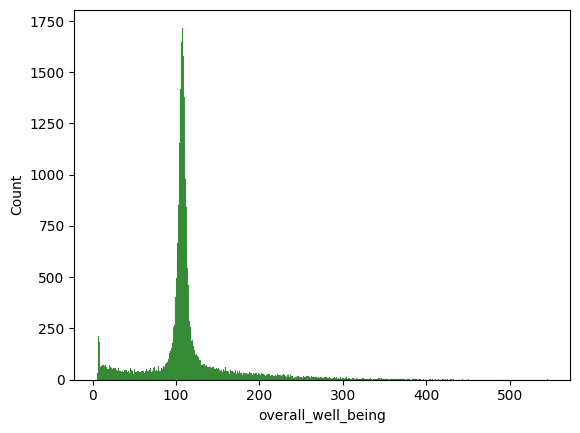

In [ ]:
sns.histplot(test['overall_well_being'], color='green')

<Axes: ylabel='overall_well_being'>

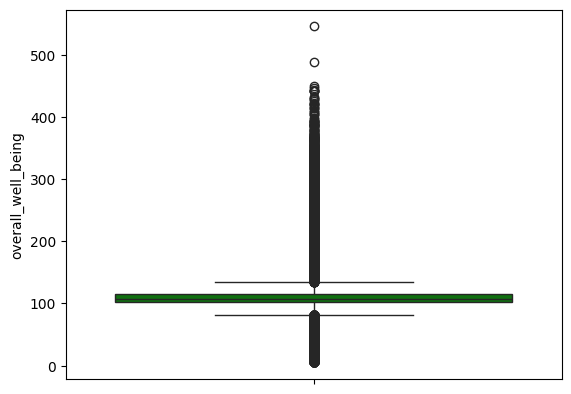

In [ ]:
sns.boxplot(test['overall_well_being'], color='green')

In [ ]:
test.describe()

,citizen_id,gender,date_of_birth,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,age
count,38643.000000,38643.000000,38643,37290.000000,37677.000000,37677.000000,37484.000000,38063.000000,38063.000000,37677.000000,37290.000000,37290.000000,38063.000000,37097.000000,37677.000000,37097.000000,38063.000000,38643.000000
mean,109487.000000,0.497218,1987-08-07 11:43:37.343373952,0.197318,1.014444,105.214634,19.215478,4.463641,7.168307,13.452971,6.387463,1.846203,25.205771,0.870052,1.247558,3.223165,113.109573,36.369330
min,90166.000000,0.000000,1923-11-05 00:00:00,0.000000,0.006600,0.050000,0.500000,0.000000,0.000000,6.996600,0.000000,0.320000,0.000000,0.000000,0.000000,0.000000,5.314500,18.000000
25%,99826.500000,0.000000,1980-02-09 00:00:00,0.000000,0.564700,94.310100,5.750450,1.902750,4.655850,12.498500,3.327825,1.648900,8.715250,0.024600,0.655700,2.473000,101.900000,27.000000
50%,109487.000000,0.000000,1989-02-05 00:00:00,0.000000,0.662200,99.864500,10.607100,4.948400,6.067800,13.472900,4.780050,1.869950,17.706200,0.166600,0.768800,3.079200,107.915000,35.000000
75%,119147.500000,1.000000,1996-09-30 00:00:00,0.000000,0.980500,106.303000,15.495650,6.946150,8.430500,14.427800,8.832500,2.071700,40.742550,1.395300,1.250100,3.859600,115.199500,44.000000
max,128808.000000,1.000000,2005-08-20 00:00:00,5.000000,10.340700,537.974000,435.471000,11.318300,43.909000,31.309600,44.336800,3.341550,153.673000,8.337700,11.055300,8.887600,545.815000,100.000000
std,11155.417563,0.499999,NaN,0.553601,0.912462,50.562016,35.652463,2.702025,3.933878,1.491189,4.275154,0.348413,19.408631,1.246798,1.215880,1.136746,50.656356,11.539433


## <font color='#BFD72F'> 9.5 Treating Unary Variables - Test</font>


In [ ]:
test_unary = test.columns[test.nunique() == 1]
print('Unary Variables: ', test_unary)

Unary Variables:  Index(['city', 'country'], dtype='object')


In [ ]:
test['city'].value_counts()

city
Mining City    38643
Name: count, dtype: int64

In [ ]:
test = test.drop('city', axis=1)

In [ ]:
# Drop unary variable
test['country'].value_counts()

country
Data Land    38643
Name: count, dtype: int64

In [ ]:
test = test.drop('country', axis=1)

In [ ]:
test.head()

,citizen_id,name,gender,date_of_birth,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,age
0,90166,Deniz,1,1987-03-23,NaN,0.6724,100.502,10.1762,1.7516,8.4129,15.1645,9.3925,2.2621,64.2378,0.0626,0.7672,4.9523,108.851,37
1,90167,Saana,1,1966-10-19,0.0,0.5993,102.870,7.1811,0.0034,6.6384,15.3898,6.6101,1.8308,18.7592,0.5960,1.4061,2.5396,111.971,57
2,90168,مرسانا,1,1989-03-05,0.0,0.6675,102.963,16.9708,2.3346,4.2747,12.7121,11.9248,1.7735,11.2036,1.3633,2.5570,2.6267,111.876,35
3,90169,Ratimir,0,1974-11-11,0.0,2.3741,101.108,11.3375,7.2085,14.3043,11.5065,3.6422,2.1187,48.5756,2.6768,0.8079,3.2889,107.669,49
4,90170,Jamie,0,1995-09-22,0.0,0.6015,100.780,4.8217,4.2585,6.3106,15.8794,7.8561,1.4942,31.5998,0.0000,1.0359,2.1572,109.756,28


## <font color='#BFD72F'> 9.6 Data Visualisation - Pearson Correlation - Test</font>

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38643 entries, 0 to 38642
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   citizen_id                               38643 non-null  int64         
 1   name                                     38643 non-null  object        
 2   gender                                   38643 non-null  int64         
 3   date_of_birth                            38643 non-null  datetime64[ns]
 4   last_year_avg_monthly_charity_donations  37290 non-null  float64       
 5   environmental_awareness_rating           37677 non-null  float64       
 6   financial_wellness_index                 37677 non-null  float64       
 7   investment_portfolio_value               37484 non-null  float64       
 8   investments_risk_appetite                38063 non-null  float64       
 9   investments_risk_tolerance             

In [ ]:
test_values = test.iloc[:,[2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

In [ ]:
cor_pearson_test = test_values.corr()
cor_pearson_test

,gender,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,tech_savviness_score,social_media_influence_score,entertainment_engagement_factor,avg_monthly_entertainment_expenses,avg_weekly_exercise_hours,health_consciousness_rating,stress_management_score,overall_well_being,age
gender,1.000000,0.003037,-0.007351,-0.000177,-0.007165,-0.002381,-0.006134,-0.000140,0.000568,-0.000155,0.000942,-0.001209,0.001597,0.000534,-0.000648,0.001160
last_year_avg_monthly_charity_donations,0.003037,1.000000,0.032562,-0.062270,0.045314,0.022959,0.038008,-0.011466,-0.167543,0.005781,-0.133704,-0.231581,0.230854,0.247766,-0.055653,-0.001077
environmental_awareness_rating,-0.007351,0.032562,1.000000,-0.145713,0.140336,0.043685,0.100628,0.032356,-0.159671,0.088159,-0.073625,0.230962,-0.200940,0.031408,-0.149749,-0.000028
financial_wellness_index,-0.000177,-0.062270,-0.145713,1.000000,0.103200,-0.029494,0.035507,-0.009671,-0.162830,-0.032621,0.047641,-0.056022,0.072839,-0.039305,0.999641,-0.007824
investment_portfolio_value,-0.007165,0.045314,0.140336,0.103200,1.000000,0.016864,0.032577,0.082170,-0.142356,-0.000423,0.081401,-0.054324,-0.064477,-0.034509,0.100911,0.002545
investments_risk_appetite,-0.002381,0.022959,0.043685,-0.029494,0.016864,1.000000,0.440378,0.049788,-0.019068,0.029811,0.011427,-0.032076,-0.015365,0.035358,-0.028451,-0.003695
investments_risk_tolerance,-0.006134,0.038008,0.100628,0.035507,0.032577,0.440378,1.000000,-0.080783,-0.271354,0.036031,0.083027,0.007462,-0.044517,0.007279,0.032872,0.002067
tech_savviness_score,-0.000140,-0.011466,0.032356,-0.009671,0.082170,0.049788,-0.080783,1.000000,0.051038,0.046762,0.068653,-0.066745,-0.074663,0.016907,0.003182,0.003289
social_media_influence_score,0.000568,-0.167543,-0.159671,-0.162830,-0.142356,-0.019068,-0.271354,0.051038,1.000000,0.175068,0.144493,0.102718,-0.029689,0.029709,-0.162137,0.001465
entertainment_engagement_factor,-0.000155,0.005781,0.088159,-0.032621,-0.000423,0.029811,0.036031,0.046762,0.175068,1.000000,0.493864,-0.029989,-0.102389,0.752556,-0.036389,0.002024


<Axes: >

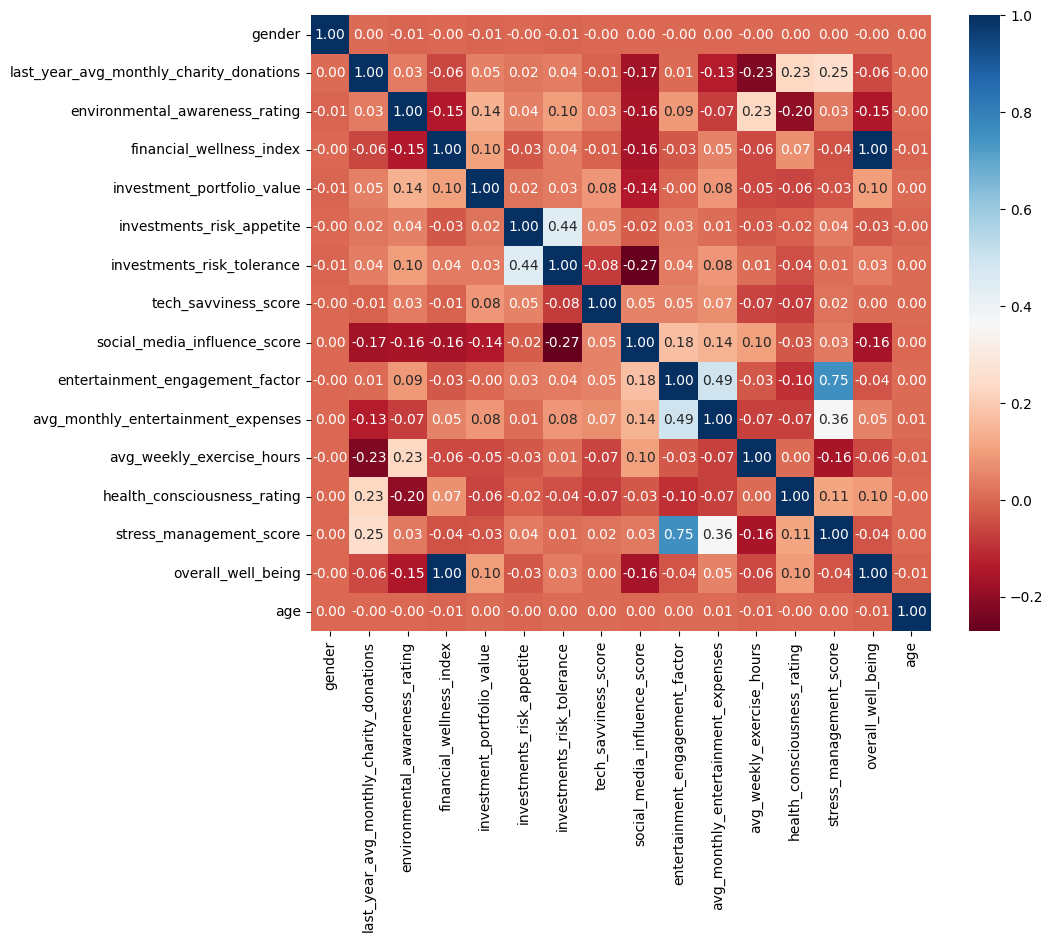

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=cor_pearson_test, annot=True, cmap = plt.cm.RdBu, fmt='.2f')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38643 entries, 0 to 38642
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   citizen_id                               38643 non-null  int64         
 1   name                                     38643 non-null  object        
 2   gender                                   38643 non-null  int64         
 3   date_of_birth                            38643 non-null  datetime64[ns]
 4   last_year_avg_monthly_charity_donations  37290 non-null  float64       
 5   environmental_awareness_rating           37677 non-null  float64       
 6   financial_wellness_index                 37677 non-null  float64       
 7   investment_portfolio_value               37484 non-null  float64       
 8   investments_risk_appetite                38063 non-null  float64       
 9   investments_risk_tolerance             

In [ ]:
test.shape

(38643, 19)

In [ ]:
test.shape

(38643, 19)

## <font color='#BFD72F'> 9.7 Treating Outliers - Test</font>

Since Kaggle needed some specific number of rows, we didn't remove outliers, still we are going to turn the age outliers into missing values and treat those after

In [ ]:
test.loc[(test['age'] < 18) | (test['age'] > 85), 'age'] = np.nan

## <font color='#BFD72F'> 9.8 Treating Missing Values - Test</font>

In [ ]:
test.isna().sum()

citizen_id                                    0
name                                          0
gender                                        0
date_of_birth                                 0
last_year_avg_monthly_charity_donations    1353
environmental_awareness_rating              966
financial_wellness_index                    966
investment_portfolio_value                 1159
investments_risk_appetite                   580
investments_risk_tolerance                  580
tech_savviness_score                        966
social_media_influence_score               1353
entertainment_engagement_factor            1353
avg_monthly_entertainment_expenses          580
avg_weekly_exercise_hours                  1546
health_consciousness_rating                 966
stress_management_score                    1546
overall_well_being                          580
age                                           6
dtype: int64

In [ ]:
test.isna().sum()/len(test)*100

citizen_id                                 0.000000
name                                       0.000000
gender                                     0.000000
date_of_birth                              0.000000
last_year_avg_monthly_charity_donations    3.501281
environmental_awareness_rating             2.499806
financial_wellness_index                   2.499806
investment_portfolio_value                 2.999250
investments_risk_appetite                  1.500919
investments_risk_tolerance                 1.500919
tech_savviness_score                       2.499806
social_media_influence_score               3.501281
entertainment_engagement_factor            3.501281
avg_monthly_entertainment_expenses         1.500919
avg_weekly_exercise_hours                  4.000725
health_consciousness_rating                2.499806
stress_management_score                    4.000725
overall_well_being                         1.500919
age                                        0.015527
dtype: float

### Treating Missing Values replacing NA's with 0 value

In [ ]:
test['last_year_avg_monthly_charity_donations'].fillna(0, inplace=True)

### Treating Missing Values with KNN

#### KNN financial_wellness_index

In [ ]:
# splitting the data

# the data that contain NA's in the "financial_wellness_index"
missing_data_fwi = test[test['financial_wellness_index'].isnull()]

# the data that doesn't contain NA's in the "financial_wellness_index"
complete_data_fwi = test.dropna(subset=['financial_wellness_index'])

In [ ]:
# Defining the feature and the target variables
feature_column_fwi = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','investment_portfolio_value','investments_risk_appetite',
                      'investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor','avg_monthly_entertainment_expenses',
                      'avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']
target_column_fwi = 'financial_wellness_index'

In [ ]:
#Picking the feature column in the complete data
X_test_fwi = complete_data_fwi[feature_column_fwi]
#Picking the target column in the complete data
y_test_fwi = complete_data_fwi[target_column_fwi]

In [ ]:
X_test_fwi.shape

(37677, 13)

In [ ]:
37677**(1/2)

194.10564133996724

In [ ]:
# Defining the optimal K as the square root of the number of samples
k = 195

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_test_fwi)

KNNImputer(n_neighbors=195)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_fwi = missing_data_fwi[feature_column_fwi]

In [ ]:
#Predicting the missing values
y_missing_predicted_fwi = knn_imputer.transform(X_missing_fwi)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_fwi[target_column_fwi] = y_missing_predicted_fwi

In [ ]:
#Joining the data of the predicted values with the data that had already the values
test = pd.concat([complete_data_fwi, missing_data_fwi])

#### KNN investment_portfolio_value

In [ ]:
# splitting the data

# the data that contain NA's in the "investment_portfolio_value"
missing_data_ipv = test[test['investment_portfolio_value'].isnull()]

# the data that doesn't contain NA's in the "investment_portfolio_value"
complete_data_ipv = test.dropna(subset=['investment_portfolio_value'])

In [ ]:
# Defining the feature and the target variables
feature_columns_ipv = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index',
                       'investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                       'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']
target_column_ipv = 'investment_portfolio_value'

In [ ]:
#Picking the feature column in the complete data
X_test_ipv = complete_data_ipv[feature_columns_ipv]
#Picking the target column in the complete data
y_test_ipv = complete_data_ipv[target_column_ipv]

In [ ]:
k = 195

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_test_ipv)

KNNImputer(n_neighbors=195)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_ipv = missing_data_ipv[feature_columns_ipv]

In [ ]:
#Predicting the missing values
y_missing_predicted_ipv = knn_imputer.transform(X_missing_ipv)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_ipv[target_column_ipv] = y_missing_predicted_ipv

In [ ]:
#Joining the data of the predicted values with the data that had already the values
test = pd.concat([complete_data_ipv, missing_data_ipv])

#### KNN investments_risk_appetite

In [ ]:
# splitting the data

# the data that contain NA's in the "investments_risk_appetite"
missing_data_ira = test[test['investments_risk_appetite'].isnull()]
# the data that doesn't contain NA's in the "investments_risk_appetite"
complete_data_ira = test.dropna(subset=['investments_risk_appetite'])

In [ ]:
# Defining the feature and the target variables
feature_columns_ira = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investment_portfolio_value',
                       'investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                       'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']
target_column_ira = 'investments_risk_appetite'

In [ ]:
#Picking the feature column in the complete data
X_test_ira = complete_data_ira[feature_columns_ira]
#Picking the target column in the complete data
y_test_ira = complete_data_ira[target_column_ira]

In [ ]:
# Defining the optimal K as the square root of the number of samples
k = 195

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_test_ira)

KNNImputer(n_neighbors=195)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_ira = missing_data_ira[feature_columns_ira]

In [ ]:
#Predicting the missing values
y_missing_predicted_ira = knn_imputer.transform(X_missing_ira)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_ira[target_column_ira] = y_missing_predicted_ira

In [ ]:
#Joining the data of the predicted values with the data that had already the values
test = pd.concat([complete_data_ira, missing_data_ira])

####KNN investments_risk_tolerance

In [ ]:
# splitting the data

# the data that contain NA's in the "investments_risk_tolerance"
missing_data_irt = test[test['investments_risk_tolerance'].isnull()]
# the data that doesn't contain NA's in the "investments_risk_tolerance"
complete_data_irt = test.dropna(subset=['investments_risk_tolerance'])

In [ ]:
# Defining the feature and the target variables
feature_columns_irt = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investment_portfolio_value',
                       'investments_risk_appetite','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                       'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']
target_column_irt = 'investments_risk_tolerance'

In [ ]:
#Picking the feature column in the complete data
X_test_irt = complete_data_irt[feature_columns_irt]
#Picking the target column in the complete data
y_test_irt = complete_data_irt[target_column_irt]

In [ ]:
# Defining the optimal K as the square root of the number of samples
k = 195

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_test_irt)

KNNImputer(n_neighbors=195)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_irt = missing_data_irt[feature_columns_irt]

In [ ]:
#Predicting the missing values
y_missing_predicted_irt = knn_imputer.transform(X_missing_irt)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_irt[target_column_irt] = y_missing_predicted_irt

In [ ]:
#Joining the data of the predicted values with the data that had already the values
test = pd.concat([complete_data_irt, missing_data_irt])

####KNN avg_monthly_entertainment_expenses

In [ ]:
# splitting the data

# the data that contain NA's in the "avg_monthly_entertainment_expenses"
missing_data_amee = test[test['avg_monthly_entertainment_expenses'].isnull()]
# the data that doesn't contain NA's in the "avg_monthly_entertainment_expenses"
complete_data_amee = test.dropna(subset=['avg_monthly_entertainment_expenses'])

In [ ]:
# Defining the feature and the target variables
feature_columns_amee = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investment_portfolio_value',
                       'investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                       'avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']
target_column_amee = 'avg_monthly_entertainment_expenses'

In [ ]:
#Picking the feature column in the complete data
X_test_amee = complete_data_amee[feature_columns_amee]
#Picking the target column in the complete data
y_test_amee = complete_data_amee[target_column_amee]

In [ ]:
k = 195

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_test_amee)

KNNImputer(n_neighbors=195)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_amee = missing_data_amee[feature_columns_amee]

In [ ]:
#Predicting the missing values
y_missing_predicted_amee = knn_imputer.transform(X_missing_amee)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_amee[target_column_amee] = y_missing_predicted_amee

In [ ]:
#Joining the data of the predicted values with the data that had already the values
test = pd.concat([complete_data_amee, missing_data_amee])

####KNN stress_management_score

In [ ]:
# splitting the data

# the data that contain NA's in the "stress_management_score"
missing_data_sms = test[test['stress_management_score'].isnull()]
# the data that doesn't contain NA's in the "stress_management_score"
complete_data_sms = test.dropna(subset=['stress_management_score'])

In [ ]:
# Defining the feature and the target variables
feature_columns_sms = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investment_portfolio_value',
                       'investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                       'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','overall_well_being']
target_column_sms = 'stress_management_score'

In [ ]:
#Picking the feature column in the complete data
X_test_sms = complete_data_sms[feature_columns_sms]
#Picking the target column in the complete data
y_test_sms = complete_data_sms[target_column_sms]

In [ ]:
# Defining the optimal K as the square root of the number of samples
k = 195

In [ ]:
# Using the KNNImputer with the K value assigned
knn_imputer = KNNImputer(n_neighbors=k)

In [ ]:
#Fitting the model
knn_imputer.fit(X_test_sms)

KNNImputer(n_neighbors=195)

In [ ]:
# Declaring a variable containing the feature column of the data with missing values on the target
X_missing_sms = missing_data_sms[feature_columns_sms]

In [ ]:
#Predicting the missing values
y_missing_predicted_sms = knn_imputer.transform(X_missing_sms)

In [ ]:
# Assigning the predicted values in the data containing the missing values
missing_data_sms[target_column_sms] = y_missing_predicted_sms

In [ ]:
#Joining the data of the predicted values with the data that had already the values
test = pd.concat([complete_data_sms, missing_data_sms])

### Treating Missing Values replacing by the median

In [ ]:
# replacing the "avg_weekly_exercise_hours" NA's with the median value
test['avg_weekly_exercise_hours'] = test['avg_weekly_exercise_hours'].fillna(test['avg_weekly_exercise_hours'].median())

In [ ]:
# replacing the "environmental_awareness_rating" NA's with the median value
test['environmental_awareness_rating'] = test['environmental_awareness_rating'].fillna(test['environmental_awareness_rating'].median())


In [ ]:
# replacing the "tech_savviness_score" NA's with the median value
test['tech_savviness_score'] = test['tech_savviness_score'].fillna(test['tech_savviness_score'].median())

In [ ]:
# replacing the "social_media_influence_score" NA's with the median value
test['social_media_influence_score'] = test['social_media_influence_score'].fillna(test['social_media_influence_score'].median())

In [ ]:
# replacing the "health_consciousness_rating" NA's with the median value
test['health_consciousness_rating'] = test['health_consciousness_rating'].fillna(test['health_consciousness_rating'].median())

In [ ]:
# replacing the "overall_well_being" NA's with the median value
test['overall_well_being'] = test['overall_well_being'].fillna(test['overall_well_being'].median())

In [ ]:
# replacing the "age" NA's with the median value
test['age']= test['age'].fillna(test['age'].median())

## <font color='#BFD72F'> 9.8 Feature Engineering - Test</font>

### Combining tech savviness score and social media influence score to create the variable online presence.

In [ ]:
# We are creating custom bins for tech_savviness_score
tech_bins = [0, 10, 15, 20, 100000000]  # Custom bins for tech_savviness_score
tech_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']  # Labels for each bin

# We are also creating custom bins for social_media_influence_score
smi_bins = [0, 10, 20, 30, 100000000]  # Custom bins for social_media_influence_score
smi_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']  # Labels for each bin

# Using numpy.digitize() to create the tech_savviness_bin column
test['tech_savviness_bin'] = np.digitize(test['tech_savviness_score'], tech_bins)
test['tech_savviness_bin'] = test['tech_savviness_bin'].replace({1: 'Low', 2: 'Medium-Low', 3: 'Medium-High', 4: 'High'})

# Using numpy.digitize() to create the social_media_influence_bin column
test['social_media_influence_bin'] = np.digitize(test['social_media_influence_score'], smi_bins)
test['social_media_influence_bin'] = test['social_media_influence_bin'].replace({1: 'Low', 2: 'Medium-Low', 3: 'Medium-High', 4: 'High'})

# And calculating composite_score with equal weights, since they are equaly important (50% for each)
test['online_presence'] = 0.5 * test['tech_savviness_score'] + 0.5 * test['social_media_influence_score']

print(test[['tech_savviness_bin', 'social_media_influence_bin', 'online_presence']])

      tech_savviness_bin social_media_influence_bin  online_presence
0            Medium-High                        Low        12.278500
1            Medium-High                        Low        10.999950
2             Medium-Low                 Medium-Low        12.318450
3             Medium-Low                        Low         7.574350
4            Medium-High                        Low        11.867750
...                  ...                        ...              ...
37021         Medium-Low                        Low         9.230175
37297         Medium-Low                        Low         7.307000
37834         Medium-Low                        Low         9.870800
7586          Medium-Low                        Low         6.760200
21089         Medium-Low                        Low         6.805050

[38643 rows x 3 columns]


### Combine the financial wellness index, investment portfolio value, investments risk appetite, and investments risk tolerance into a single score representing each citizen's financial stability. Repeating the same steps we took for the variables before:

In [ ]:
# We are creating custom bins for financial_wellness_index
fw_bins = [0, 100, 200, 300, float('inf')]  # Custom bins for financial_wellness_index
fw_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']  # Labels for each bin

# We are also creating custom bins for investment_portfolio_value
ipv_bins = [0, 50, 100, 150, float('inf')]  # Custom bins for investment_portfolio_value
ipv_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']  # Labels for each bin

# Creating custom bins for investments_risk_appetite
risk_appetite_bins = [0, 2, 4, 6, 8, float('inf')]  # Custom bins for investments_risk_appetite
risk_appetite_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  # Labels for each bin

# Creating custom bins for investments_risk_tolerance
risk_tolerance_bins = [0, 5, 10, 15, 20, float('inf')]  # Custom bins for investments_risk_tolerance
risk_tolerance_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  # Labels for each bin

# Using numpy.digitize() to create the financial_wellness_bin column
test['financial_wellness_bin'] = np.digitize(test['financial_wellness_index'], fw_bins)
test['financial_wellness_bin'] = test['financial_wellness_bin'].replace({1: 'Low', 2: 'Medium-Low', 3: 'Medium-High', 4: 'High'})

# Using numpy.digitize() to create the investment_portfolio_bin column
test['investment_portfolio_bin'] = np.digitize(test['investment_portfolio_value'], ipv_bins)
test['investment_portfolio_bin'] = test['investment_portfolio_bin'].replace({1: 'Low', 2: 'Medium-Low', 3: 'Medium-High', 4: 'High'})

# Using numpy.digitize() to create the risk_appetite_bin column
test['risk_appetite_bin'] = np.digitize(test['investments_risk_appetite'], risk_appetite_bins)
test['risk_appetite_bin'] = test['risk_appetite_bin'].replace({1: 'Very Low', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very High'})

# Using numpy.digitize() to create the risk_tolerance_bin column
test['risk_tolerance_bin'] = np.digitize(test['investments_risk_tolerance'], risk_tolerance_bins)
test['risk_tolerance_bin'] = test['risk_tolerance_bin'].replace({1: 'Very Low', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very High'})

# And calculating financial_stability with equal weights (25% each)
test['financial_stability'] = (
    0.25 * test['financial_wellness_index'] +
    0.25 * test['investment_portfolio_value'] +
    0.25 * test['investments_risk_appetite'] +
    0.25 * test['investments_risk_tolerance']
)

print(test[['financial_wellness_bin', 'investment_portfolio_bin', 'risk_appetite_bin', 'risk_tolerance_bin', 'financial_stability']])

      financial_wellness_bin investment_portfolio_bin risk_appetite_bin  \
0                 Medium-Low                      Low          Very Low   
1                 Medium-Low                      Low          Very Low   
2                 Medium-Low                      Low               Low   
3                 Medium-Low                      Low              High   
4                 Medium-Low                      Low            Medium   
...                      ...                      ...               ...   
37021                    Low                      Low              High   
37297             Medium-Low                      Low            Medium   
37834                    Low                      Low               Low   
7586                     Low                      Low            Medium   
21089                    Low                      Low          Very Low   

      risk_tolerance_bin  financial_stability  
0                    Low            30.210675  
1  

### Combine investments risk appetite and investments risk tolerance to categorize each citizen into a risk profile category.

#### Min Max Scalling

#### Scale investment risk appetite and tolerance.

 Using MinMax scaller since most of our data isn't normally distributed.

In [ ]:
# Create a RobustScaler object
robust_scaler = RobustScaler()

# Fit the RobustScaler to your selected columns and transform them
test[['last_year_avg_monthly_charity_donations', 'environmental_awareness_rating', 'financial_wellness_index', 'investment_portfolio_value','investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being','online_presence','financial_stability']] = robust_scaler.fit_transform(test[['last_year_avg_monthly_charity_donations', 'environmental_awareness_rating', 'financial_wellness_index', 'investment_portfolio_value','investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being','online_presence','financial_stability']])

# Create a MinMaxScaler object with the desired range
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply MinMax scaling to the robust scaled columns
test[['last_year_avg_monthly_charity_donations', 'environmental_awareness_rating', 'financial_wellness_index', 'investment_portfolio_value','investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being','online_presence','financial_stability']] = min_max_scaler.fit_transform(test[['last_year_avg_monthly_charity_donations', 'environmental_awareness_rating', 'financial_wellness_index', 'investment_portfolio_value','investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being','online_presence','financial_stability']])

In [ ]:
# Calculate average , by calculating the average of both scaled variables
average_risk = (test['investments_risk_appetite'] + test['investments_risk_tolerance']) / 2

# Use numpy.digitize() to map average to risk profile categories
test['risk_profile_category'] = np.digitize(average_risk, bins=[0, 0.2, 0.4, 0.6, 0.8, 1])
test['risk_profile_category'] = test['risk_profile_category'].replace({1: 'Risk averse', 2: 'Cautious', 3: 'Moderate', 4: 'Risk taker', 5: 'Risk lover'})
test.tail()

,citizen_id,name,gender,date_of_birth,last_year_avg_monthly_charity_donations,environmental_awareness_rating,financial_wellness_index,investment_portfolio_value,investments_risk_appetite,investments_risk_tolerance,...,age,tech_savviness_bin,social_media_influence_bin,online_presence,financial_wellness_bin,investment_portfolio_bin,risk_appetite_bin,risk_tolerance_bin,financial_stability,risk_profile_category
37021,127187,Naksh,0,1988-10-21,0.0,0.075372,0.180376,0.013385,0.552115,0.130130,...,35.0,Medium-Low,Low,0.181408,Low,Low,High,Low,0.189997,Cautious
37297,127463,Branko,0,1987-06-03,0.0,0.073195,0.279593,0.035644,0.508469,0.170430,...,37.0,Medium-Low,Low,0.105249,Medium-Low,Low,Medium,Low,0.297919,Cautious
37834,128000,Ümit,0,1984-09-13,0.6,0.060789,0.180665,0.034400,0.349788,0.056537,...,39.0,Medium-Low,Low,0.206777,Low,Low,Low,Very Low,0.196346,Cautious
7586,97752,Leon,0,1980-10-29,0.0,0.250801,0.170969,0.000000,0.487706,0.115541,...,43.0,Medium-Low,Low,0.083595,Low,Low,Medium,Low,0.169435,Cautious
21089,111255,Oskar,0,1989-03-12,0.0,0.016973,0.000000,0.000000,0.069463,0.172903,...,35.0,Medium-Low,Low,0.085371,Low,Low,Very Low,Low,0.011453,Risk averse


In [ ]:
test['risk_profile_category'].value_counts()


risk_profile_category
Cautious       15688
Risk averse    13810
Moderate        9010
Risk taker       135
Name: count, dtype: int64

We delete the variables entertainment_engagement_factor and financial_wellness_index since they are highly correlated with the other variabels, as seen in the heatmap in 2.6

In [ ]:
test = test.drop('entertainment_engagement_factor', axis=1)

In [ ]:
test = test.drop('financial_wellness_index', axis=1)

# <font color='#BFD72F'> 10. Test Prediction</font>

Dropping the columns that don't matter to the prediction, including the ones excluded using the RFE

In [ ]:
train_split = train.drop(['name','date_of_birth','tech_savviness_bin','social_media_influence_bin','financial_wellness_bin','investment_portfolio_bin','risk_appetite_bin','risk_tolerance_bin','risk_profile_category', 'age','gender','financial_stability'], axis=1)

In [ ]:
test_split = test.drop(['citizen_id','name','date_of_birth','tech_savviness_bin','social_media_influence_bin','financial_wellness_bin','investment_portfolio_bin','risk_appetite_bin','risk_tolerance_bin','risk_profile_category', 'age','gender','financial_stability'], axis=1)

In [ ]:
base_learners = [('adb',aboost), ('rdf',modelRF_maxdepth10), ('B-E',bagging_DT_40)]
modelSC = StackingClassifier(estimators=base_learners)

modelSC.fit(train_split.drop('lifestyle_type', axis=1), train_split['lifestyle_type'])

predictions = modelSC.predict(test_split)

In [ ]:
print(predictions)

['Travel Enthusiast' 'Fitness Enthusiast' 'Fitness Enthusiast' ...
 'Health-Conscious' 'Adventure Seeker' 'Investor']


In [ ]:
final_sample = pd.DataFrame({'citizen_id':test['citizen_id'],'lifestyle_type': predictions})

In [ ]:
final_sample.head()

,citizen_id,lifestyle_type
0,90166,Travel Enthusiast
1,90167,Fitness Enthusiast
2,90168,Fitness Enthusiast
3,90169,Adventure Seeker
4,90170,Travel Enthusiast


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/DM2/Projeto/'

final_sample.to_csv(path + 'DT_Group09.csv', index=False)